# XGBoost Master Branch

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

### Some Functions

In [ ]:
def evaluate_regression(y_true, y_pred):
    """
    Function to calculate and print regression evaluation metrics: MAE, MSE, RMSE, MAPE.
    
    Parameters:
    y_true (array-like): True target values.
    y_pred (array-like): Predicted target values.

    Returns:
    dict: A dictionary containing the calculated metrics.
    """
    # Calculate MAE
    mae = mean_absolute_error(y_true, y_pred)
    
    # Calculate MSE
    mse = mean_squared_error(y_true, y_pred)
    
    # Calculate RMSE
    rmse = np.sqrt(mse)
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    # Print results
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%')
    
    # Return a dictionary of results
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape * 100}

# Example usage:
# metrics = evaluate_regression(y_test, y_pred)


### Data Loading

Loop 1

In [224]:
# Loop 1
# Load and preprocess data
econ_data = pd.read_csv('main_data.csv')

df = econ_data[[
'Date', 'GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ',
'ExpGoServ', 'Unempl', 'PCE', 'ProPriceInd', '10yIntRate', 'GloWheat',
'GloUranium', 'GloPalmOil', 'GloBrentCrude', 'SP500',
'Dow_Jones_Target', 'NASDAQ',
'Weekday_Friday', 'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Monday', 
'Weekday_Tuesday', 'Weekday_Wednesday', 'Weekday_Thursday',
'Weekday_Sin', 'Weekday_Cos',
'Federal_Debt', 'Real_Estate_Loans'
]]

Loop 2

In [225]:
#Loop 2
econ_weather_data = pd.read_csv('main_data.csv')

df_l2 = econ_weather_data[[
'Date', 'GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ',
'ExpGoServ', 'Unempl', 'PCE', 'ProPriceInd', '10yIntRate', 'GloWheat',
'GloUranium', 'GloPalmOil', 'GloBrentCrude', 'Real_Estate_Loans', 'SP500',
'Dow_Jones_Target', 'NASDAQ', 'Federal_Debt', 'temperature_2m_mean (°C) NY', 'daylight_duration (s) NY',
'rain_sum (mm) NY', 'snowfall_sum (cm) NY',
'wind_speed_10m_max (km/h) NY', 'temperature_2m_mean (°C) LA',
'daylight_duration (s) LA', 'rain_sum (mm) LA', 'snowfall_sum (cm) LA',
'wind_speed_10m_max (km/h) LA', 'temperature_2m_mean (°C) CH',
'daylight_duration (s) CH', 'rain_sum (mm) CH', 'snowfall_sum (cm) CH',
'wind_speed_10m_max (km/h) CH', 'temperature_2m_mean (°C) SF',
'daylight_duration (s) SF', 'rain_sum (mm) SF', 'snowfall_sum (cm) SF',
'wind_speed_10m_max (km/h) SF', 'temperature_2m_mean (°C) HU',
'daylight_duration (s) HU', 'rain_sum (mm) HU', 'snowfall_sum (cm) HU',
'wind_speed_10m_max (km/h) HU', 'temperature_2m_mean (°C) DL',
'daylight_duration (s) DL', 'rain_sum (mm) DL', 'snowfall_sum (cm) DL',
'wind_speed_10m_max (km/h) DL', 'temperature_2m_mean (°C) WA',
'daylight_duration (s) WA', 'rain_sum (mm) WA', 'snowfall_sum (cm) WA',
'wind_speed_10m_max (km/h) WA', 'temperature_2m_mean (°C) AT',
'daylight_duration (s) AT', 'rain_sum (mm) AT', 'snowfall_sum (cm) AT',
'wind_speed_10m_max (km/h) AT', 'temperature_2m_mean (°C) SE',
'daylight_duration (s) SE', 'rain_sum (mm) SE', 'snowfall_sum (cm) SE',
'wind_speed_10m_max (km/h) SE', 'Weekday_Sin', 'Weekday_Cos',
'Weekday_Friday', 'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Monday', 
'Weekday_Tuesday', 'Weekday_Wednesday', 'Weekday_Thursday'
]]

Loop 3

In [226]:
#Loop 3
econ_weather_google_data = pd.read_csv('main_data.csv')

df_l3 = econ_weather_google_data[[
        'Date', 'Apple', 'Facebook', 'Health', 'Inlfation', 'Pizza', 'Prices',
       'Twitter', 'War', 'Crisi', 'GDP (Google_search)', 'Dollar', 'Election',
       'Income', 'Taxes', 'weather', 'Storm', 'Social Media', 'Trade',
       'Attack', 'Fake News', 'Donald Trump', 'Delivery', 'Stocks', 'Politics',
       'COVID-19', 'Loans', 'GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ',
       'ExpGoServ', 'Unempl', 'PCE', 'ProPriceInd', '10yIntRate', 'GloWheat',
       'GloUranium', 'GloPalmOil', 'GloBrentCrude',
       'temperature_2m_mean (°C) NY', 'daylight_duration (s) NY',
       'rain_sum (mm) NY', 'snowfall_sum (cm) NY',
       'wind_speed_10m_max (km/h) NY', 'temperature_2m_mean (°C) LA',
       'daylight_duration (s) LA', 'rain_sum (mm) LA', 'snowfall_sum (cm) LA',
       'wind_speed_10m_max (km/h) LA', 'temperature_2m_mean (°C) CH',
       'daylight_duration (s) CH', 'rain_sum (mm) CH', 'snowfall_sum (cm) CH',
       'wind_speed_10m_max (km/h) CH', 'temperature_2m_mean (°C) SF',
       'daylight_duration (s) SF', 'rain_sum (mm) SF', 'snowfall_sum (cm) SF',
       'wind_speed_10m_max (km/h) SF', 'temperature_2m_mean (°C) HU',
       'daylight_duration (s) HU', 'rain_sum (mm) HU', 'snowfall_sum (cm) HU',
       'wind_speed_10m_max (km/h) HU', 'temperature_2m_mean (°C) DL',
       'daylight_duration (s) DL', 'rain_sum (mm) DL', 'snowfall_sum (cm) DL',
       'wind_speed_10m_max (km/h) DL', 'temperature_2m_mean (°C) WA',
       'daylight_duration (s) WA', 'rain_sum (mm) WA', 'snowfall_sum (cm) WA',
       'wind_speed_10m_max (km/h) WA', 'temperature_2m_mean (°C) AT',
       'daylight_duration (s) AT', 'rain_sum (mm) AT', 'snowfall_sum (cm) AT',
       'wind_speed_10m_max (km/h) AT', 'temperature_2m_mean (°C) SE',
       'daylight_duration (s) SE', 'rain_sum (mm) SE', 'snowfall_sum (cm) SE',
       'wind_speed_10m_max (km/h) SE', 'Real_Estate_Loans', 'SP500',
       'Dow_Jones_Target', 'NASDAQ', 'Federal_Debt', 'Weekday_Sin', 'Weekday_Cos',
       'Weekday_Friday', 'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Monday', 
        'Weekday_Tuesday', 'Weekday_Wednesday', 'Weekday_Thursday'
       ]]


Loop 4

In [227]:
#Loop 4
df_sentiment = pd.read_csv('main_data_cut_for_sentiment.csv')

df_l4 = df_sentiment[['Date', 'Apple', 'Facebook', 'Health', 'Inlfation', 'Pizza', 'Prices',
        'Twitter', 'War', 'Crisi', 'GDP (Google_search)', 'Dollar', 'Election',
       'Income', 'Taxes', 'weather', 'Storm', 'Social Media', 'Trade',
       'Attack', 'Fake News', 'Donald Trump', 'Delivery', 'Stocks', 'Politics',
       'COVID-19', 'Loans', 'GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ',
       'ExpGoServ', 'Unempl', 'PCE', 'ProPriceInd', '10yIntRate', 'GloWheat',
       'GloUranium', 'GloPalmOil', 'GloBrentCrude',
       'temperature_2m_mean (°C) NY', 'daylight_duration (s) NY',
       'rain_sum (mm) NY', 'snowfall_sum (cm) NY',
       'wind_speed_10m_max (km/h) NY', 'temperature_2m_mean (°C) LA',
       'daylight_duration (s) LA', 'rain_sum (mm) LA', 'snowfall_sum (cm) LA',
       'wind_speed_10m_max (km/h) LA', 'temperature_2m_mean (°C) CH',
       'daylight_duration (s) CH', 'rain_sum (mm) CH', 'snowfall_sum (cm) CH',
       'wind_speed_10m_max (km/h) CH', 'temperature_2m_mean (°C) SF',
       'daylight_duration (s) SF', 'rain_sum (mm) SF', 'snowfall_sum (cm) SF',
       'wind_speed_10m_max (km/h) SF', 'temperature_2m_mean (°C) HU',
       'daylight_duration (s) HU', 'rain_sum (mm) HU', 'snowfall_sum (cm) HU',
       'wind_speed_10m_max (km/h) HU', 'temperature_2m_mean (°C) DL',
       'daylight_duration (s) DL', 'rain_sum (mm) DL', 'snowfall_sum (cm) DL',
       'wind_speed_10m_max (km/h) DL', 'temperature_2m_mean (°C) WA',
       'daylight_duration (s) WA', 'rain_sum (mm) WA', 'snowfall_sum (cm) WA',
       'wind_speed_10m_max (km/h) WA', 'temperature_2m_mean (°C) AT',
       'daylight_duration (s) AT', 'rain_sum (mm) AT', 'snowfall_sum (cm) AT',
       'wind_speed_10m_max (km/h) AT', 'temperature_2m_mean (°C) SE',
       'daylight_duration (s) SE', 'rain_sum (mm) SE', 'snowfall_sum (cm) SE',
       'wind_speed_10m_max (km/h) SE', 'Real_Estate_Loans', 'SP500',
       'Dow_Jones_Target', 'NASDAQ', 'Federal_Debt', 'Weekday_Sin', 'Weekday_Cos', 
       'neg', 'pos', 'neu', 'compound',
        #  'Weekday_Friday', 'Weekday_Saturday',
        # 'Weekday_Sunday', 'Weekday_Monday', 
        # 'Weekday_Tuesday', 'Weekday_Wednesday', 'Weekday_Thursday'
       ]]

## Loop 1

### Building more features to better predict the target

In [228]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

/var/folders/nk/5g8df1k14r5f9gfjzz29tky40000gn/T/ipykernel_38049/3722283800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


Decomposing to create better features

In [ ]:
# Apply seasonal decomposition
decomposition = seasonal_decompose(df['Dow_Jones_Target'], model='additive', period=60)

df = df.copy()
df['Trend'] = decomposition.trend
df['Seasonal'] = decomposition.seasonal
df['Residual'] = decomposition.resid

df.dropna(inplace=True)

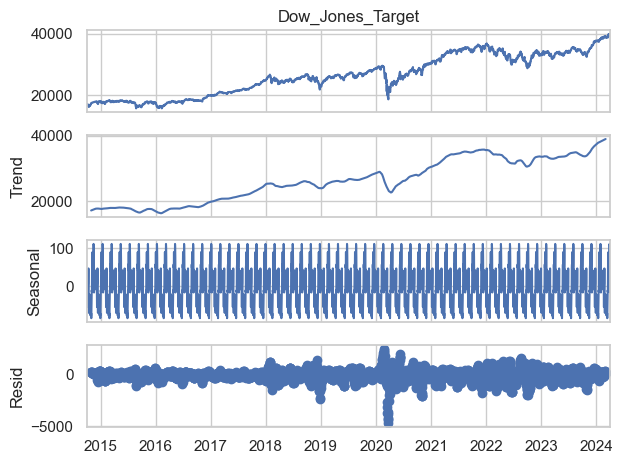

In [230]:
decomposition.plot()
plt.show()

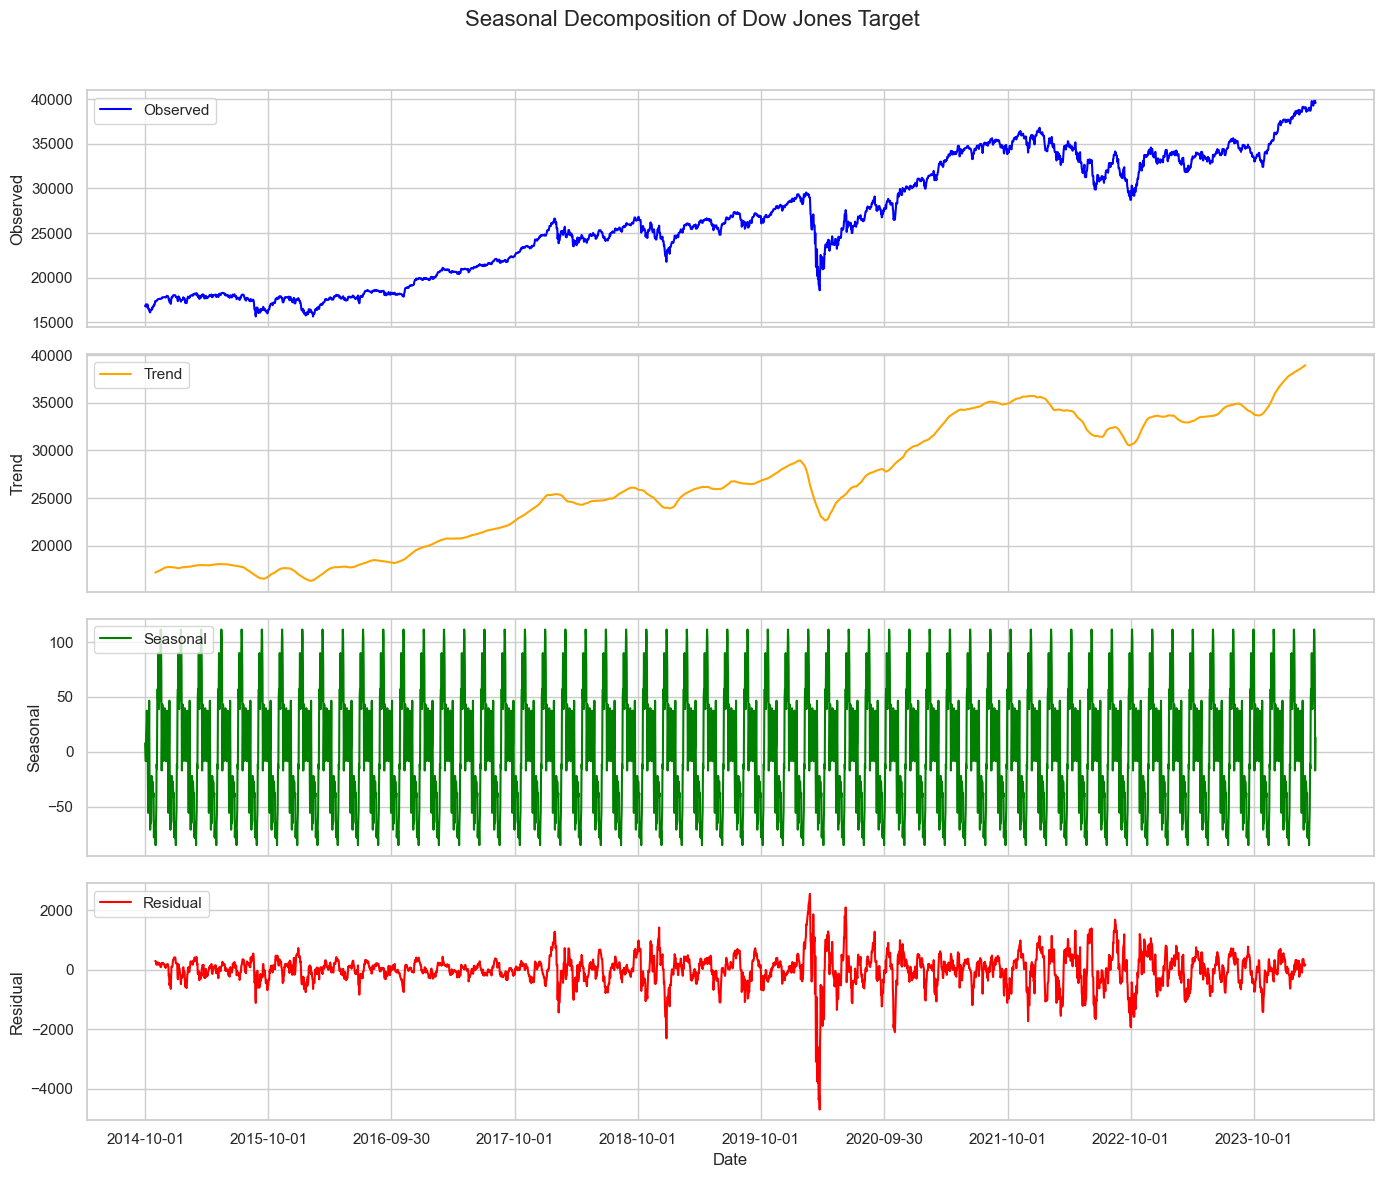

In [ ]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

ax1.plot(econ_data['Date'], decomposition.observed, label='Observed', color='blue')
ax1.set_ylabel('Observed')
ax1.legend(loc='upper left')

ax2.plot(econ_data['Date'], decomposition.trend, label='Trend', color='orange')
ax2.set_ylabel('Trend')
ax2.legend(loc='upper left')

ax3.plot(econ_data['Date'], decomposition.seasonal, label='Seasonal', color='green')
ax3.set_ylabel('Seasonal')
ax3.legend(loc='upper left')

ax4.plot(econ_data['Date'], decomposition.resid, label='Residual', color='red')
ax4.set_ylabel('Residual')
ax4.legend(loc='upper left')

ax4.set_xlabel('Date')
ax4.xaxis.set_major_locator(mdates.YearLocator())

fig.suptitle('Seasonal Decomposition of Dow Jones Target', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('seasonal_decomposition_XGBoost.pdf', format='pdf')
plt.show()

create lagged values for features (except the excluded ones) and target

In [ ]:
# List all columns except the target column 'Dow_Jones_Target'
features = df.columns.tolist()
features.remove('Dow_Jones_Target')


# Exclude weekday-related columns from lagged feature generation
features = [col for col in df.columns if col not in [
    'Weekday_Friday', 'Weekday_Saturday', 'Weekday_Sunday',
    'Weekday_Monday', 'Weekday_Tuesday', 'Weekday_Wednesday', 'Weekday_Thursday',
    'Weekday_Sin', 'Weekday_Cos'
]]

# Create a dictionary to store lagged columns
lagged_features = {}

# Generate lagged features for all columns in 'features' list and target variable
for lag in range(1, 6):
    for feature in features:
        lagged_features[f'{feature}_lag_{lag}'] = df[feature].shift(lag)
    lagged_features[f'Close_lag_{lag}'] = df['Dow_Jones_Target'].shift(lag)

# Concatenate the original dataframe with the new lagged features
df = pd.concat([df, pd.DataFrame(lagged_features)], axis=1)

df.dropna(inplace=True)


In [233]:
# df.columns

# import pandas as pd
# from IPython.display import display, HTML

# # Assuming X_train is a DataFrame
# # Convert X_train to HTML and wrap it in a scrollable div
# html = df.to_html()
# scrollable_html = f"""
# <div style="max-height: 400px; overflow-y: scroll;">
#     {html}
# </div>
# """

# # Display the scrollable HTML
# display(HTML(scrollable_html))

build rolling and exponential moving averages

In [ ]:
# Define rolling and exponential moving average windows
rolling_windows = [7, 30]  # 7-day and 30-day windows
ema_spans = [7, 30]        # EMA with a span of 7 days and 30 days

# Create a copy of the dataframe to avoid modifying the original
df = df.copy()

# Add rolling averages and exponential moving averages for target variable (Dow_Jones_Target)
for window in rolling_windows:
    df[f'Dow_Jones_Target_roll_avg_{window}'] = df['Dow_Jones_Target'].rolling(window=window).mean()

for span in ema_spans:
    df[f'Dow_Jones_Target_ema_{span}'] = df['Dow_Jones_Target'].ewm(span=span, adjust=False).mean()

key_features = ['SP500', 'NASDAQ', '10yIntRate']  # Add other relevant features as needed -----> 

for feature in key_features:
    for window in rolling_windows:
        df[f'{feature}_roll_avg_{window}'] = df[feature].rolling(window=window).mean()
    for span in ema_spans:
        df[f'{feature}_ema_{span}'] = df[feature].ewm(span=span, adjust=False).mean()

df.dropna(inplace=True)


Create the RSI index

In [ ]:
df = df.copy()

# Calculate 50-day and 200-day moving averages for Dow Jones Target
df['Dow_Jones_50_day_MA'] = df['Dow_Jones_Target'].rolling(window=50).mean()
df['Dow_Jones_200_day_MA'] = df['Dow_Jones_Target'].rolling(window=200).mean()

# Function to calculate Relative Strength Index (RSI)
def calculate_rsi(series, window=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['Dow_Jones_RSI_14'] = calculate_rsi(df['Dow_Jones_Target'], window=14)

df.dropna(inplace=True)


### Plotting Moving Avg. etc.

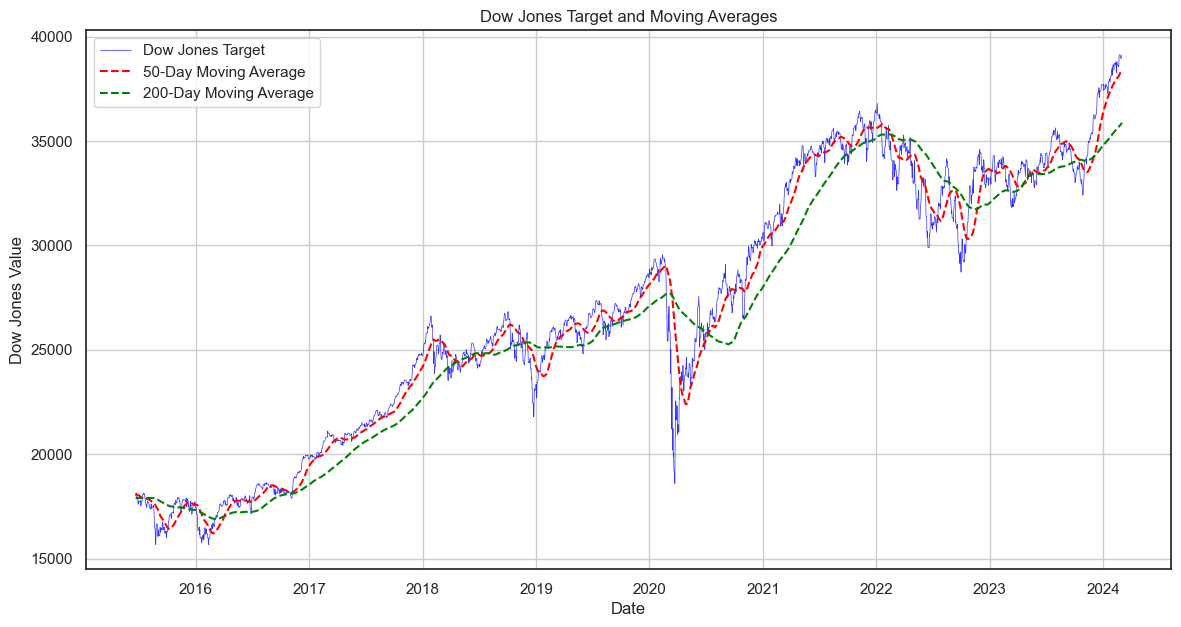

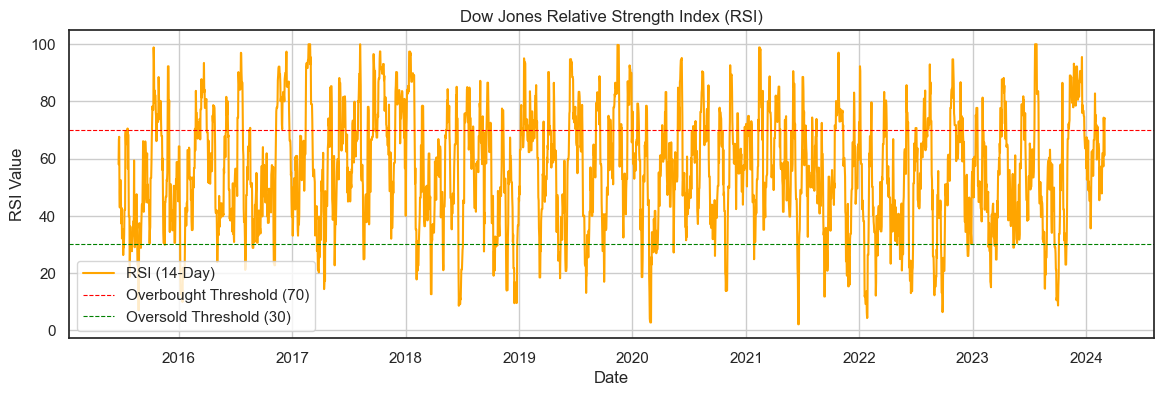

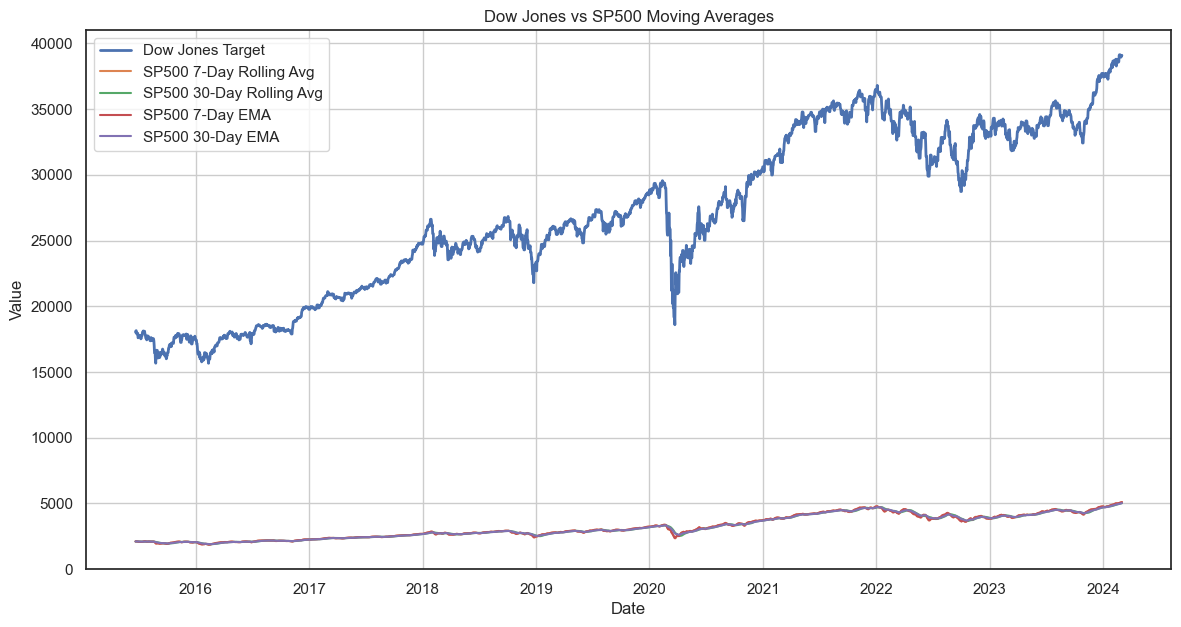

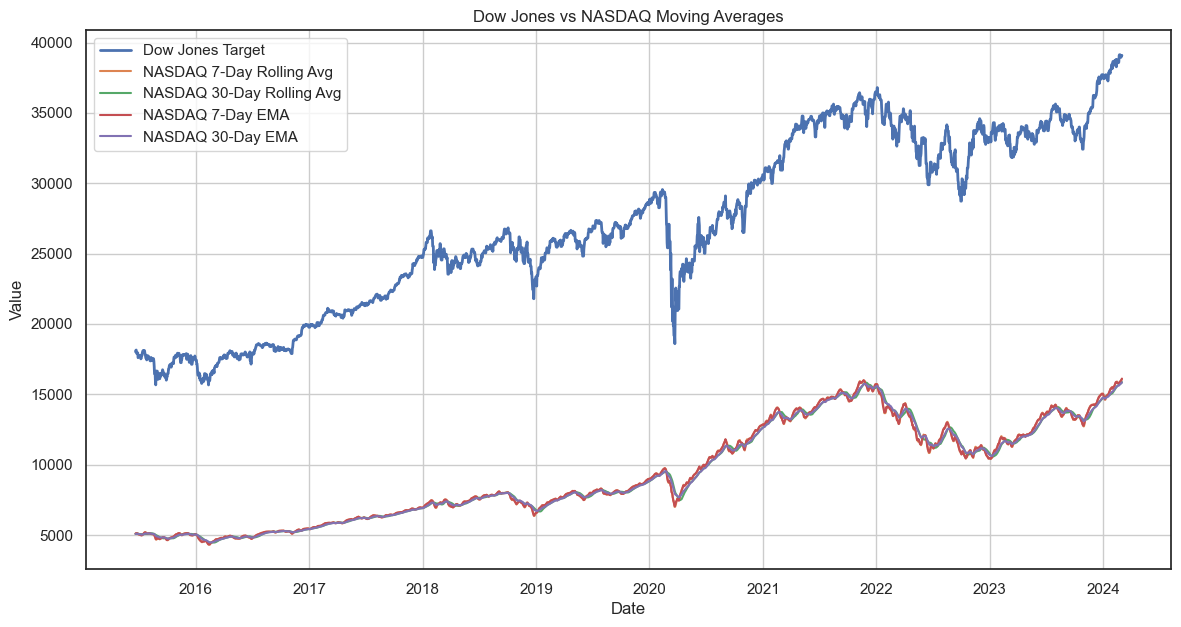

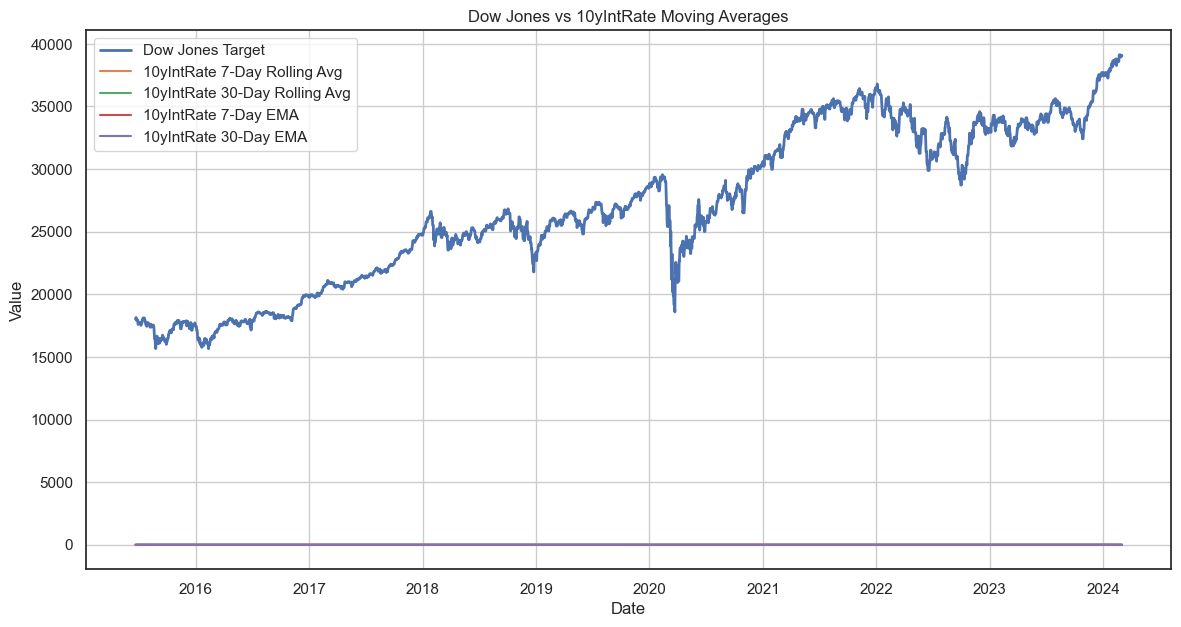

In [ ]:
# Plot Dow Jones Target along with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Dow_Jones_Target'], label='Dow Jones Target', linewidth=0.5, color='blue', alpha=0.8)
plt.plot(df.index, df['Dow_Jones_50_day_MA'], label='50-Day Moving Average', linestyle='--', color='red')
plt.plot(df.index, df['Dow_Jones_200_day_MA'], label='200-Day Moving Average', linestyle='--', color='green')
plt.title('Dow Jones Target and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Dow Jones Value')
plt.legend()
plt.grid()
plt.savefig('Dow_Jones_Target_and_Moving_Averages.pdf', format='pdf')
plt.show()

# Plot RSI for Dow Jones
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['Dow_Jones_RSI_14'], label='RSI (14-Day)', color='orange')
plt.axhline(70, color='red', linestyle='--', linewidth=0.8, label='Overbought Threshold (70)')
plt.axhline(30, color='green', linestyle='--', linewidth=0.8, label='Oversold Threshold (30)')
plt.title('Dow Jones Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid()
plt.show()

# Plot Moving Averages of Key Features (SP500, NASDAQ, 10yIntRate) along with Dow Jones
key_features = ['SP500', 'NASDAQ', '10yIntRate']
for feature in key_features:
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Dow_Jones_Target'], label='Dow Jones Target', linewidth=2)
    for window in rolling_windows:
        plt.plot(df.index, df[f'{feature}_roll_avg_{window}'], label=f'{feature} {window}-Day Rolling Avg')
    for span in ema_spans:
        plt.plot(df.index, df[f'{feature}_ema_{span}'], label=f'{feature} {span}-Day EMA')
    plt.title(f'Dow Jones vs {feature} Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()


### Train / Test Split

In [237]:
train_size = int(len(df) * 0.85)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Features and target
X_train = train.drop(columns=['Dow_Jones_Target'])
y_train = train['Dow_Jones_Target']
X_test = test.drop(columns=['Dow_Jones_Target'])
y_test = test['Dow_Jones_Target']

In [238]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2701, 164) (2701,) (477, 164) (477,)


### Hyperparameter Tuning

In [239]:
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import make_scorer, mean_absolute_percentage_error
# import xgboost as xgb

# # Custom scoring function for MAPE
# mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)


# param_grid = {
#     'n_estimators': [100, 300, 500, 1000, 1500, 2000],  # Cover fewer and more boosting rounds
#     'max_depth': [3, 5, 7, 10, 15, 20],                # Allow for shallower and deeper trees
#     'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],    # Cover very slow to moderately fast learning
#     'subsample': [0.6, 0.8, 0.9, 1.0],                 # Explore wider subsampling rates
#     'colsample_bytree': [0.6, 0.8, 0.9, 1.0],          # Vary the proportion of features used
#     'gamma': [0, 0.01, 0.05, 0.1, 0.5, 1],             # Include more aggressive splitting penalties
#     'min_child_weight': [1, 3, 5, 10],                 # Allow smaller or larger leaf nodes
#     'reg_alpha': [0, 0.1, 0.2, 0.5, 1, 2],             # Broader range of L1 regularization
#     'reg_lambda': [0.01, 0.1, 0.5, 1, 5],              # Include smaller and larger ridge penalties
#     'scale_pos_weight': [1, 2, 5, 10, 20],             # Handle imbalanced datasets
# }



# from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
# from sklearn.metrics import make_scorer, mean_absolute_percentage_error
# import xgboost as xgb

# # Custom scoring function for MAPE
# mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# # Initialize the XGBoost regressor
# xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# # Define a time-series-aware cross-validator
# tscv = TimeSeriesSplit(n_splits=3)  # Choose the number of splits based on your dataset size

# # Use RandomizedSearchCV for hyperparameter optimization with TimeSeriesSplit
# random_search = RandomizedSearchCV(
#     estimator=xg_reg,
#     param_distributions=param_grid,  # Your parameter grid
#     scoring=mape_scorer,
#     n_iter=100,                       # Number of random parameter combinations to try
#     cv=tscv,                         # Time-series-aware cross-validation
#     verbose=1,
#     random_state=42,
#     n_jobs=-1                        # Use all available cores
# )

# # Fit the RandomizedSearchCV
# random_search.fit(X_train, y_train)

# # Best parameters and model performance
# best_params = random_search.best_params_
# best_model = random_search.best_estimator_

# print("Best Parameters:", best_params)

# # Predict and evaluate the model on the test data
# y_pred = best_model.predict(X_test)
# mape = mean_absolute_percentage_error(y_test, y_pred)
# print(f'Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%')


### Applying the Model

In [240]:
# model accoring to the best hyperparameters
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    subsample=1.0,
    reg_lambda=2,
    reg_aplha=0,
    n_estimators=500,
    min_child_weight=5,
    max_depth=20,
    learning_rate=0.1,
    gamma=0.2,
    colsample_bytree=0.6,
    random_state=42
)


# Fit the XGBoost model
xg_reg.fit(X_train, y_train)

/Users/maxquarder/.pyenv/versions/3.11.6/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "reg_aplha" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [241]:
# Make predictions
y_pred = xg_reg.predict(X_test)

#xg_reg.save_model('xgboost_model_loop2.json')

metrics = evaluate_regression(y_test, y_pred)

Mean Absolute Error (MAE): 499.0040418632077
Mean Squared Error (MSE): 752711.074871327
Root Mean Squared Error (RMSE): 867.5892316478617
Mean Absolute Percentage Error (MAPE): 1.36%


### Plots

In [242]:
# X_train.columns

# import pandas as pd
# from IPython.display import display, HTML

# # Assuming X_train is a DataFrame
# # Convert X_train to HTML and wrap it in a scrollable div
# html = X_train.to_html()
# scrollable_html = f"""
# <div style="max-height: 400px; overflow-y: scroll;">
#     {html}
# </div>
# """

# # Display the scrollable HTML
# display(HTML(scrollable_html))

Getting the feature importance

/var/folders/nk/5g8df1k14r5f9gfjzz29tky40000gn/T/ipykernel_38049/2814665530.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y=feature_importances.index, data=feature_importances, palette='viridis')


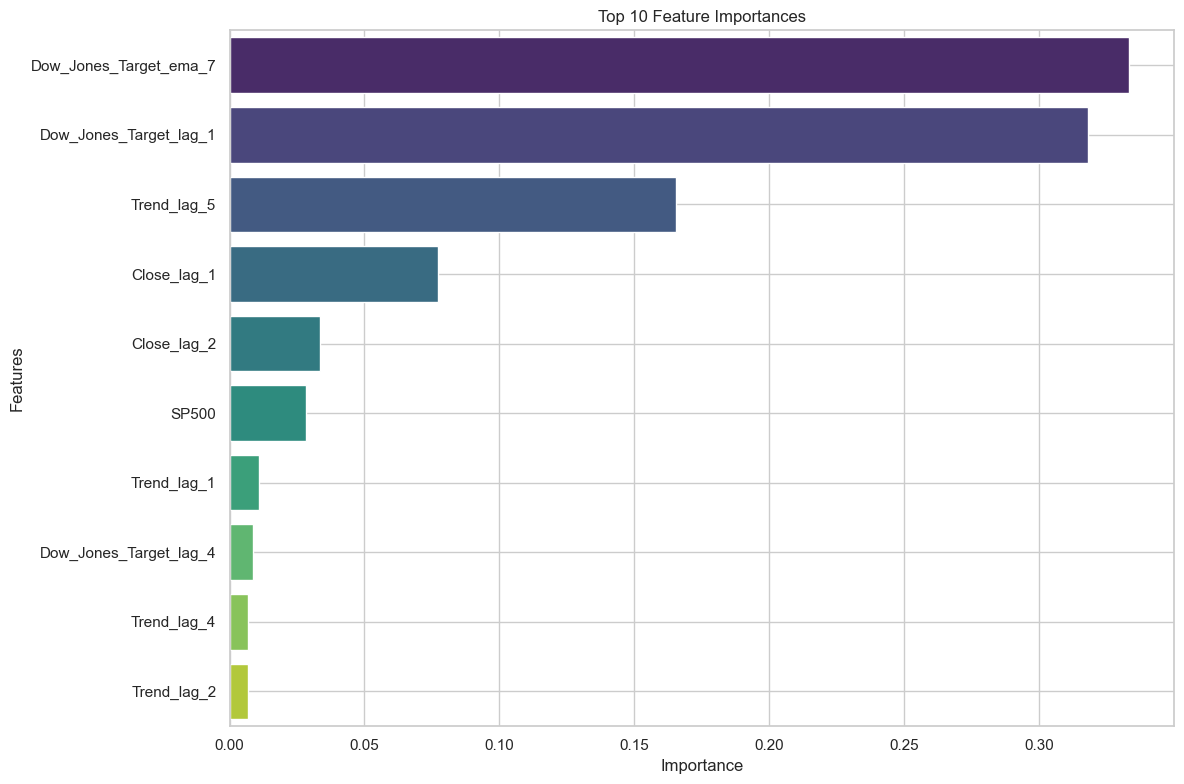

In [ ]:
feature_importances = pd.DataFrame(data=xg_reg.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False).head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances, palette='viridis')

plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.grid(True)
plt.tight_layout()
plt.savefig('feature_importances_XGBoost_loop1.pdf', format='pdf', bbox_inches='tight')
plt.show()


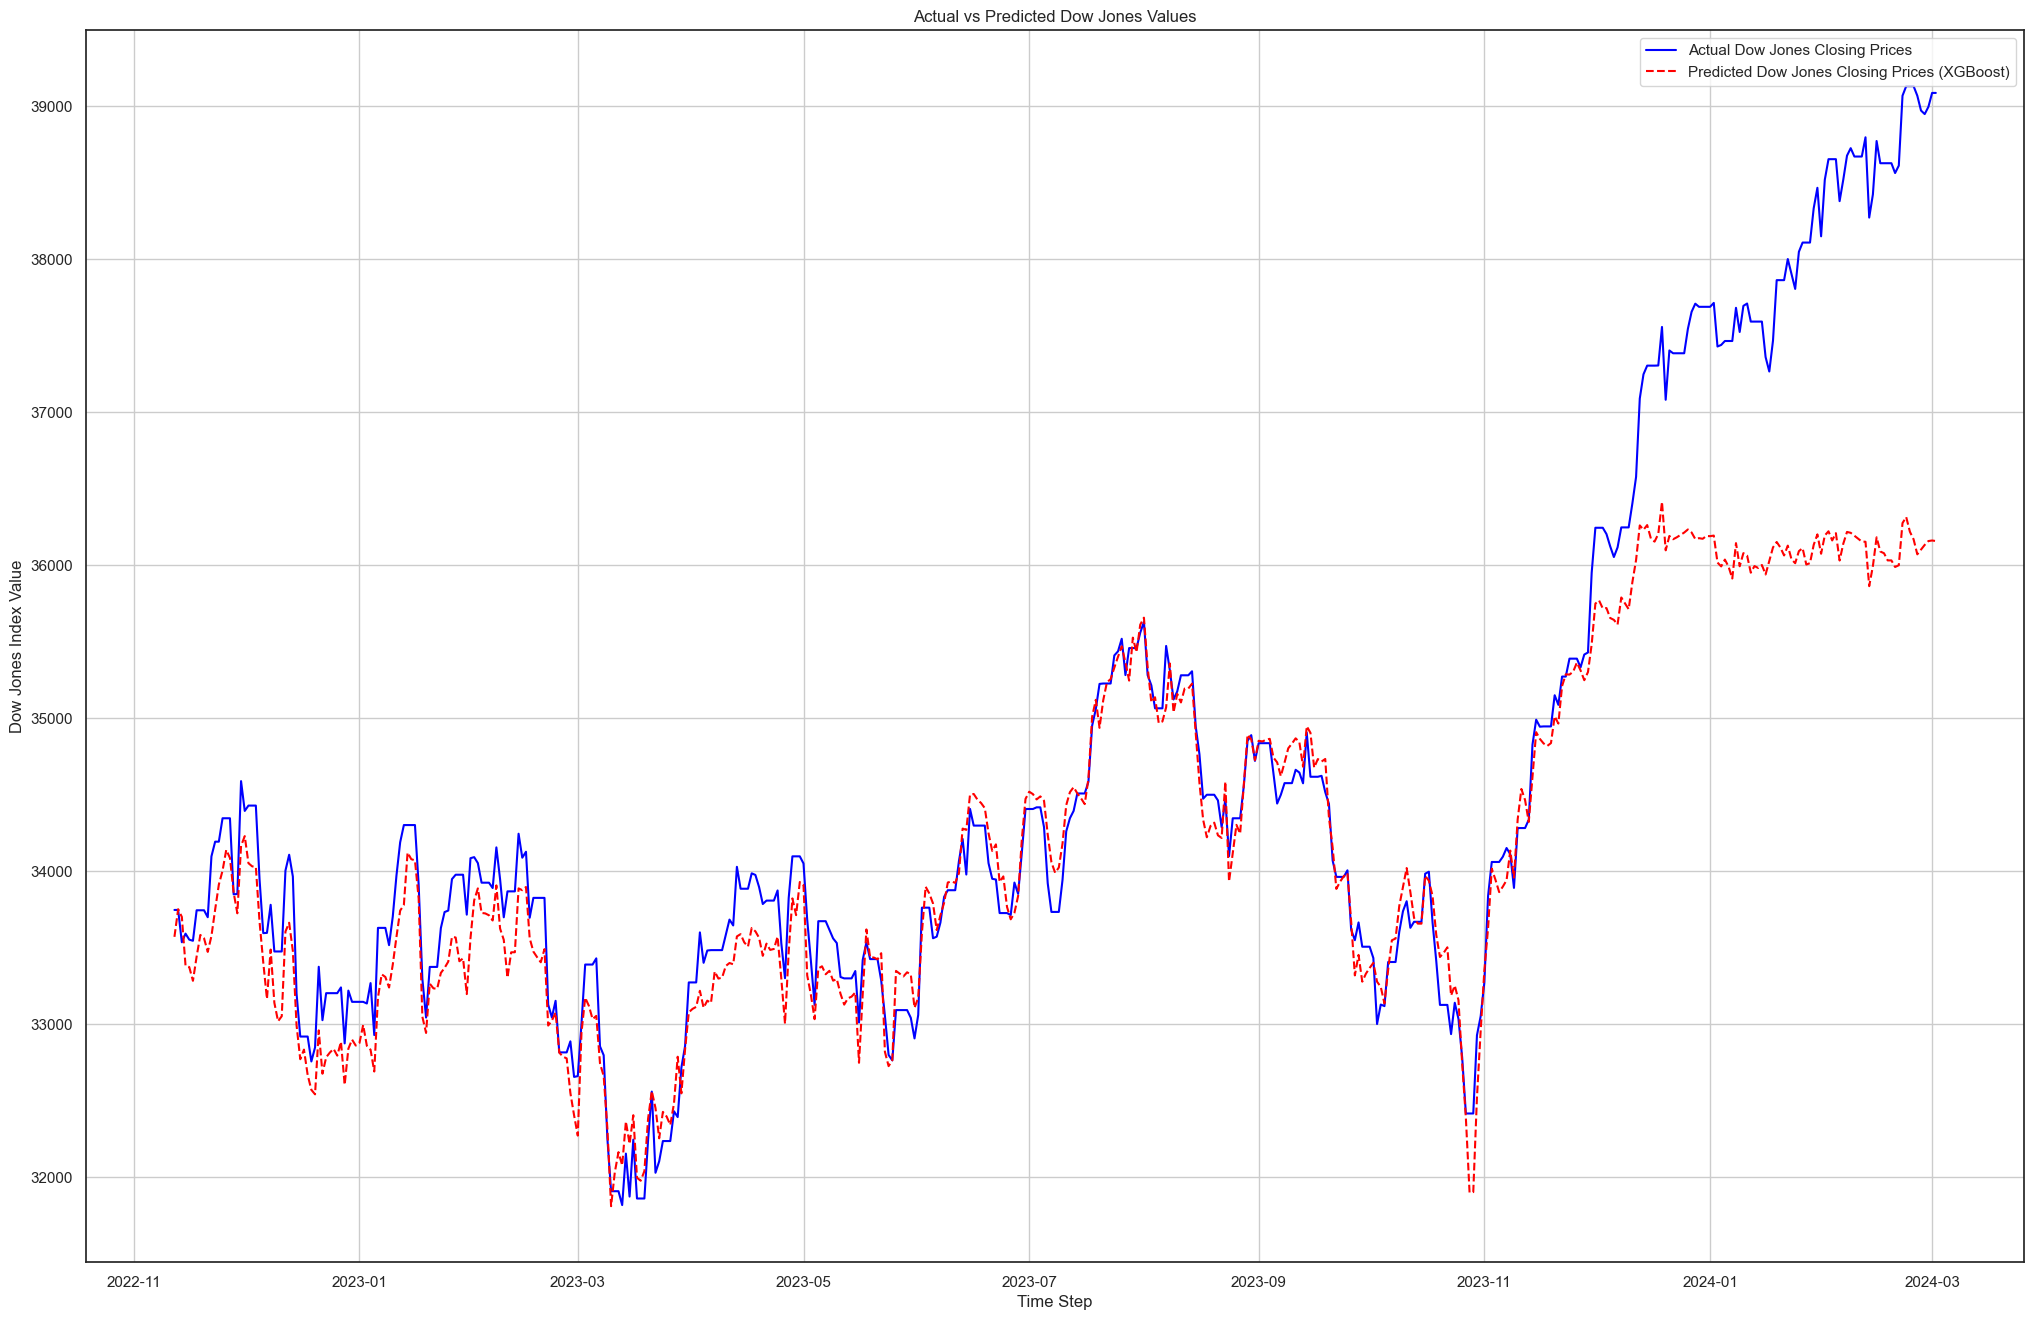

In [ ]:
sns.set(style="white")

plt.figure(figsize=(25, 16))
plt.plot(y_test.index, y_test, label='Actual Dow Jones Closing Prices', linestyle='-', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Dow Jones Closing Prices (XGBoost)', linestyle='--', color='red')
plt.xlabel("Time Step")
plt.ylabel("Dow Jones Index Value")
plt.title("Actual vs Predicted Dow Jones Values")
plt.legend()
plt.grid()
plt.savefig('XGBoost_Loop1_Simplemodel_actual_vs_predicted.pdf', format='pdf')
plt.show()

Plotting the redisuals (useful for explanation of why the model did not perfrom well starting in 2024)

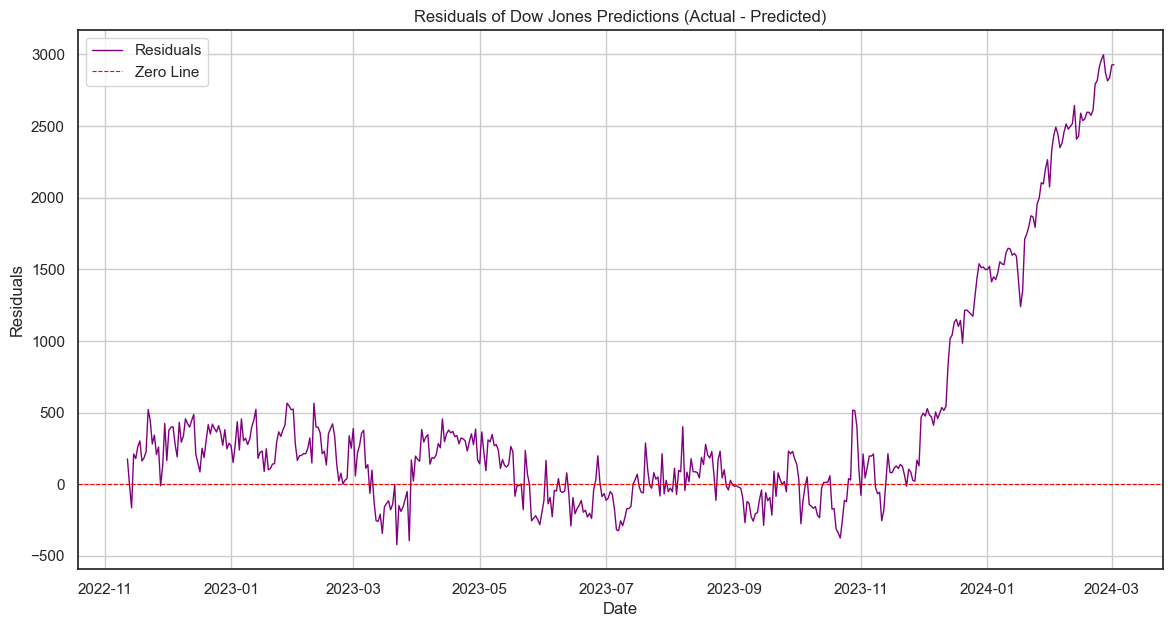

In [245]:
import matplotlib.pyplot as plt

# Calculate residuals (actual - predicted)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, residuals, label='Residuals', color='purple', linewidth=1)
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Zero Line')
plt.title('Residuals of Dow Jones Predictions (Actual - Predicted)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.savefig('residuals_Loop1_XGBoost.pdf', format='pdf')
plt.show()


In [246]:
# # Initialize the number of days to predict
# days_to_predict = 5

# # Prepare a DataFrame to hold future predictions
# future_predictions = []
# future_dates = []

# # Start with the most recent data row
# latest_data = df.iloc[-1:].copy()

# # Iteratively predict future values
# for i in range(days_to_predict):
#     # Prepare features for prediction
#     features_for_prediction = latest_data.drop(columns=['Dow_Jones_Target']).values.reshape(1, -1)
    
#     # Predict the next day's Dow Jones value
#     next_prediction = xg_reg.predict(features_for_prediction)[0]
    
#     # Record the prediction
#     future_predictions.append(next_prediction)
#     next_date = latest_data.index[-1] + pd.Timedelta(days=1)
#     future_dates.append(next_date)
    
#     # Create the next row of features for the subsequent prediction
#     new_row = latest_data.iloc[0].copy()  # Copy the current row's features
    
#     # Update lagged features
#     for lag_col in [col for col in latest_data.columns if '_lag_' in col]:
#         lag_number = int(lag_col.split('_lag_')[-1])
#         if lag_number == 1:
#             new_row[lag_col] = next_prediction
#         else:
#             new_row[lag_col] = latest_data.iloc[0][lag_col.replace(f'_lag_{lag_number}', f'_lag_{lag_number-1}')]
    
#     # Update rolling averages (e.g., 7-day, 30-day)
#     for window in rolling_windows:
#         ma_col = f'Dow_Jones_Target_roll_avg_{window}'
#         new_row[ma_col] = (
#             pd.Series([next_prediction] + latest_data['Dow_Jones_Target'][-(window - 1):].tolist())
#             .rolling(window=window)
#             .mean()
#             .iloc[-1]
#         )
    
#     # Update RSI
#     new_row['Dow_Jones_RSI_14'] = calculate_rsi(
#         pd.Series([next_prediction] + latest_data['Dow_Jones_Target'][-13:].tolist()), window=14
#     ).iloc[-1]
    
#     # Update the target for the next prediction
#     new_row['Dow_Jones_Target'] = next_prediction
    
#     # Create a DataFrame for the new row and update the latest data
#     latest_data = pd.DataFrame([new_row], index=[next_date])

# # Create a DataFrame for future predictions
# future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Dow_Jones': future_predictions})
# future_df.set_index('Date', inplace=True)

# # Output the future predictions
# print(future_df)

# # Visualization of predictions
# import matplotlib.pyplot as plt

# plt.figure(figsize=(14, 7))
# plt.plot(df.index, df['Dow_Jones_Target'], label='Historical Dow Jones', linewidth=2)
# plt.plot(future_df.index, future_df['Predicted_Dow_Jones'], label='Predicted Dow Jones', color='red', linestyle='--')
# plt.title('Dow Jones Historical and Predicted Values')
# plt.xlabel('Date')
# plt.ylabel('Dow Jones Value')
# plt.legend()
# plt.grid()
# plt.show()


In [247]:
# plt.figure(figsize=(14, 7))

# # Plot only the relevant portion of historical data
# historical_plot_length = 50  # Adjust this to show the last N days of historical data
# plt.plot(df.index[-historical_plot_length:], df['Dow_Jones_Target'][-historical_plot_length:], 
#          label='Historical Dow Jones', linewidth=2)

# # Plot the future predictions
# plt.plot(future_df.index, future_df['Predicted_Dow_Jones'], label='Predicted Dow Jones', color='red', linestyle='--')

# # Formatting the plot
# plt.title(f'Dow Jones Predictions for {days_to_predict} Days Ahead')
# plt.xlabel('Date')
# plt.ylabel('Dow Jones Value')
# plt.legend()
# plt.grid()
# plt.show()


## Loop 2

In [156]:
df_l2['Date'] = pd.to_datetime(df_l2['Date'])

df_l2.set_index('Date', inplace=True)

/var/folders/nk/5g8df1k14r5f9gfjzz29tky40000gn/T/ipykernel_38049/3159864895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l2['Date'] = pd.to_datetime(df_l2['Date'])


### Building more features to better predict the target

In [ ]:
decomposition = seasonal_decompose(df_l2['Dow_Jones_Target'], model='additive', period=60)

df_l2 = df_l2.copy() 
df_l2['Trend'] = decomposition.trend
df_l2['Seasonal'] = decomposition.seasonal
df_l2['Residual'] = decomposition.resid

df_l2.dropna(inplace=True)

In [ ]:

features = df_l2.columns.tolist()
features.remove('Dow_Jones_Target')


# Exclude weekday-related columns from lagged feature generation
features = [col for col in df_l2.columns if col not in [
    'Weekday_Friday', 'Weekday_Saturday', 'Weekday_Sunday',
    'Weekday_Monday', 'Weekday_Tuesday', 'Weekday_Wednesday', 'Weekday_Thursday',
    'Weekday_Sin', 'Weekday_Cos'
]]

# Create a dictionary to store lagged columns
lagged_features = {}

# Generate lagged features for all columns in 'features' list and target variable
for lag in range(1, 6):
    for feature in features:
        lagged_features[f'{feature}_lag_{lag}'] = df_l2[feature].shift(lag)
    lagged_features[f'Close_lag_{lag}'] = df_l2['Dow_Jones_Target'].shift(lag)

# Concatenate the original dataframe with the new lagged features
df_l2 = pd.concat([df_l2, pd.DataFrame(lagged_features)], axis=1)

df_l2.dropna(inplace=True)


In [ ]:
# Define rolling and exponential moving average windows
rolling_windows = [7, 30]  # 7-day and 30-day windows
ema_spans = [7, 30]        # EMA with a span of 7 days and 30 days

# Create a copy of the dataframe to avoid modifying the original
df_l2 = df_l2.copy()

# Add rolling averages and exponential moving averages for target variable (Dow_Jones_Target)
for window in rolling_windows:
    df_l2[f'Dow_Jones_Target_roll_avg_{window}'] = df_l2['Dow_Jones_Target'].rolling(window=window).mean()

for span in ema_spans:
    df_l2[f'Dow_Jones_Target_ema_{span}'] = df_l2['Dow_Jones_Target'].ewm(span=span, adjust=False).mean()


key_features = ['SP500', 'NASDAQ', '10yIntRate']  # Add other relevant features as needed -----> 

for feature in key_features:
    for window in rolling_windows:
        df_l2[f'{feature}_roll_avg_{window}'] = df_l2[feature].rolling(window=window).mean()
    for span in ema_spans:
        df_l2[f'{feature}_ema_{span}'] = df_l2[feature].ewm(span=span, adjust=False).mean()

df_l2.dropna(inplace=True)


In [ ]:
df_l2 = df_l2.copy()

# Calculate 50-day and 200-day moving averages for Dow Jones Target
df_l2['Dow_Jones_50_day_MA'] = df_l2['Dow_Jones_Target'].rolling(window=50).mean()
df_l2['Dow_Jones_200_day_MA'] = df_l2['Dow_Jones_Target'].rolling(window=200).mean()

# Function to calculate Relative Strength Index (RSI)
def calculate_rsi(series, window=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI with a 14-day window (typical for RSI calculations)
df_l2['Dow_Jones_RSI_14'] = calculate_rsi(df_l2['Dow_Jones_Target'], window=14)

df_l2.dropna(inplace=True)


### Train / Test Split

In [161]:
train_size = int(len(df_l2) * 0.85)
train = df_l2.iloc[:train_size]
test = df_l2.iloc[train_size:]

# Features and target
X_train_l2 = train.drop(columns=['Dow_Jones_Target'])
y_train_l2 = train['Dow_Jones_Target']
X_test_l2 = test.drop(columns=['Dow_Jones_Target'])
y_test_l2 = test['Dow_Jones_Target']

### Applying the Model

In [162]:
# model accoring to the best hyperparameters
xg_reg_l2 = xgb.XGBRegressor(
    objective='reg:squarederror',
    subsample=1.0,
    reg_lambda=2,
    reg_aplha=0,
    n_estimators=500,
    min_child_weight=5,
    max_depth=20,
    learning_rate=0.1,
    gamma=0.2,
    colsample_bytree=0.6,
    random_state=42
)


# Fit the XGBoost model
xg_reg_l2.fit(X_train_l2, y_train_l2)

/Users/maxquarder/.pyenv/versions/3.11.6/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:41:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "reg_aplha" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [163]:
# Make predictions
y_pred_l2 = xg_reg_l2.predict(X_test_l2)

#xg_reg.save_model('xgboost_model_loop2.json')

metrics_l2 = evaluate_regression(y_test_l2, y_pred_l2)

Mean Absolute Error (MAE): 515.4164234473272
Mean Squared Error (MSE): 869363.5232866856
Root Mean Squared Error (RMSE): 932.3966555531425
Mean Absolute Percentage Error (MAPE): 1.40%


### Plots

/var/folders/nk/5g8df1k14r5f9gfjzz29tky40000gn/T/ipykernel_38049/3743677883.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y=feature_importances_l2.index, data=feature_importances_l2, palette='viridis')


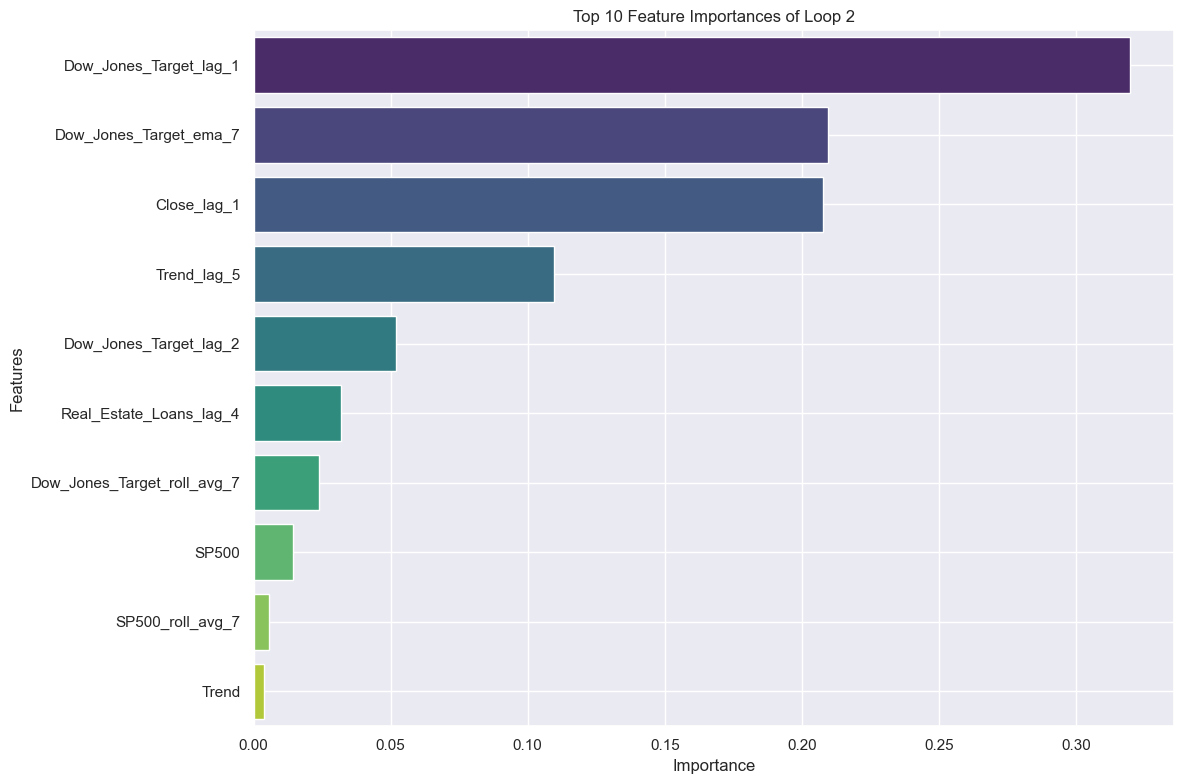

In [ ]:
feature_importances_l2 = pd.DataFrame(data=xg_reg_l2.feature_importances_,
                                   index=X_train_l2.columns,
                                   columns=['importance']).sort_values('importance', ascending=False).head(10)


sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y=feature_importances_l2.index, data=feature_importances_l2, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances of Loop 2')
plt.grid(True)
plt.tight_layout()
plt.savefig('feature_importances_XGBoost_loop2.pdf', format='pdf', bbox_inches='tight')
plt.show()


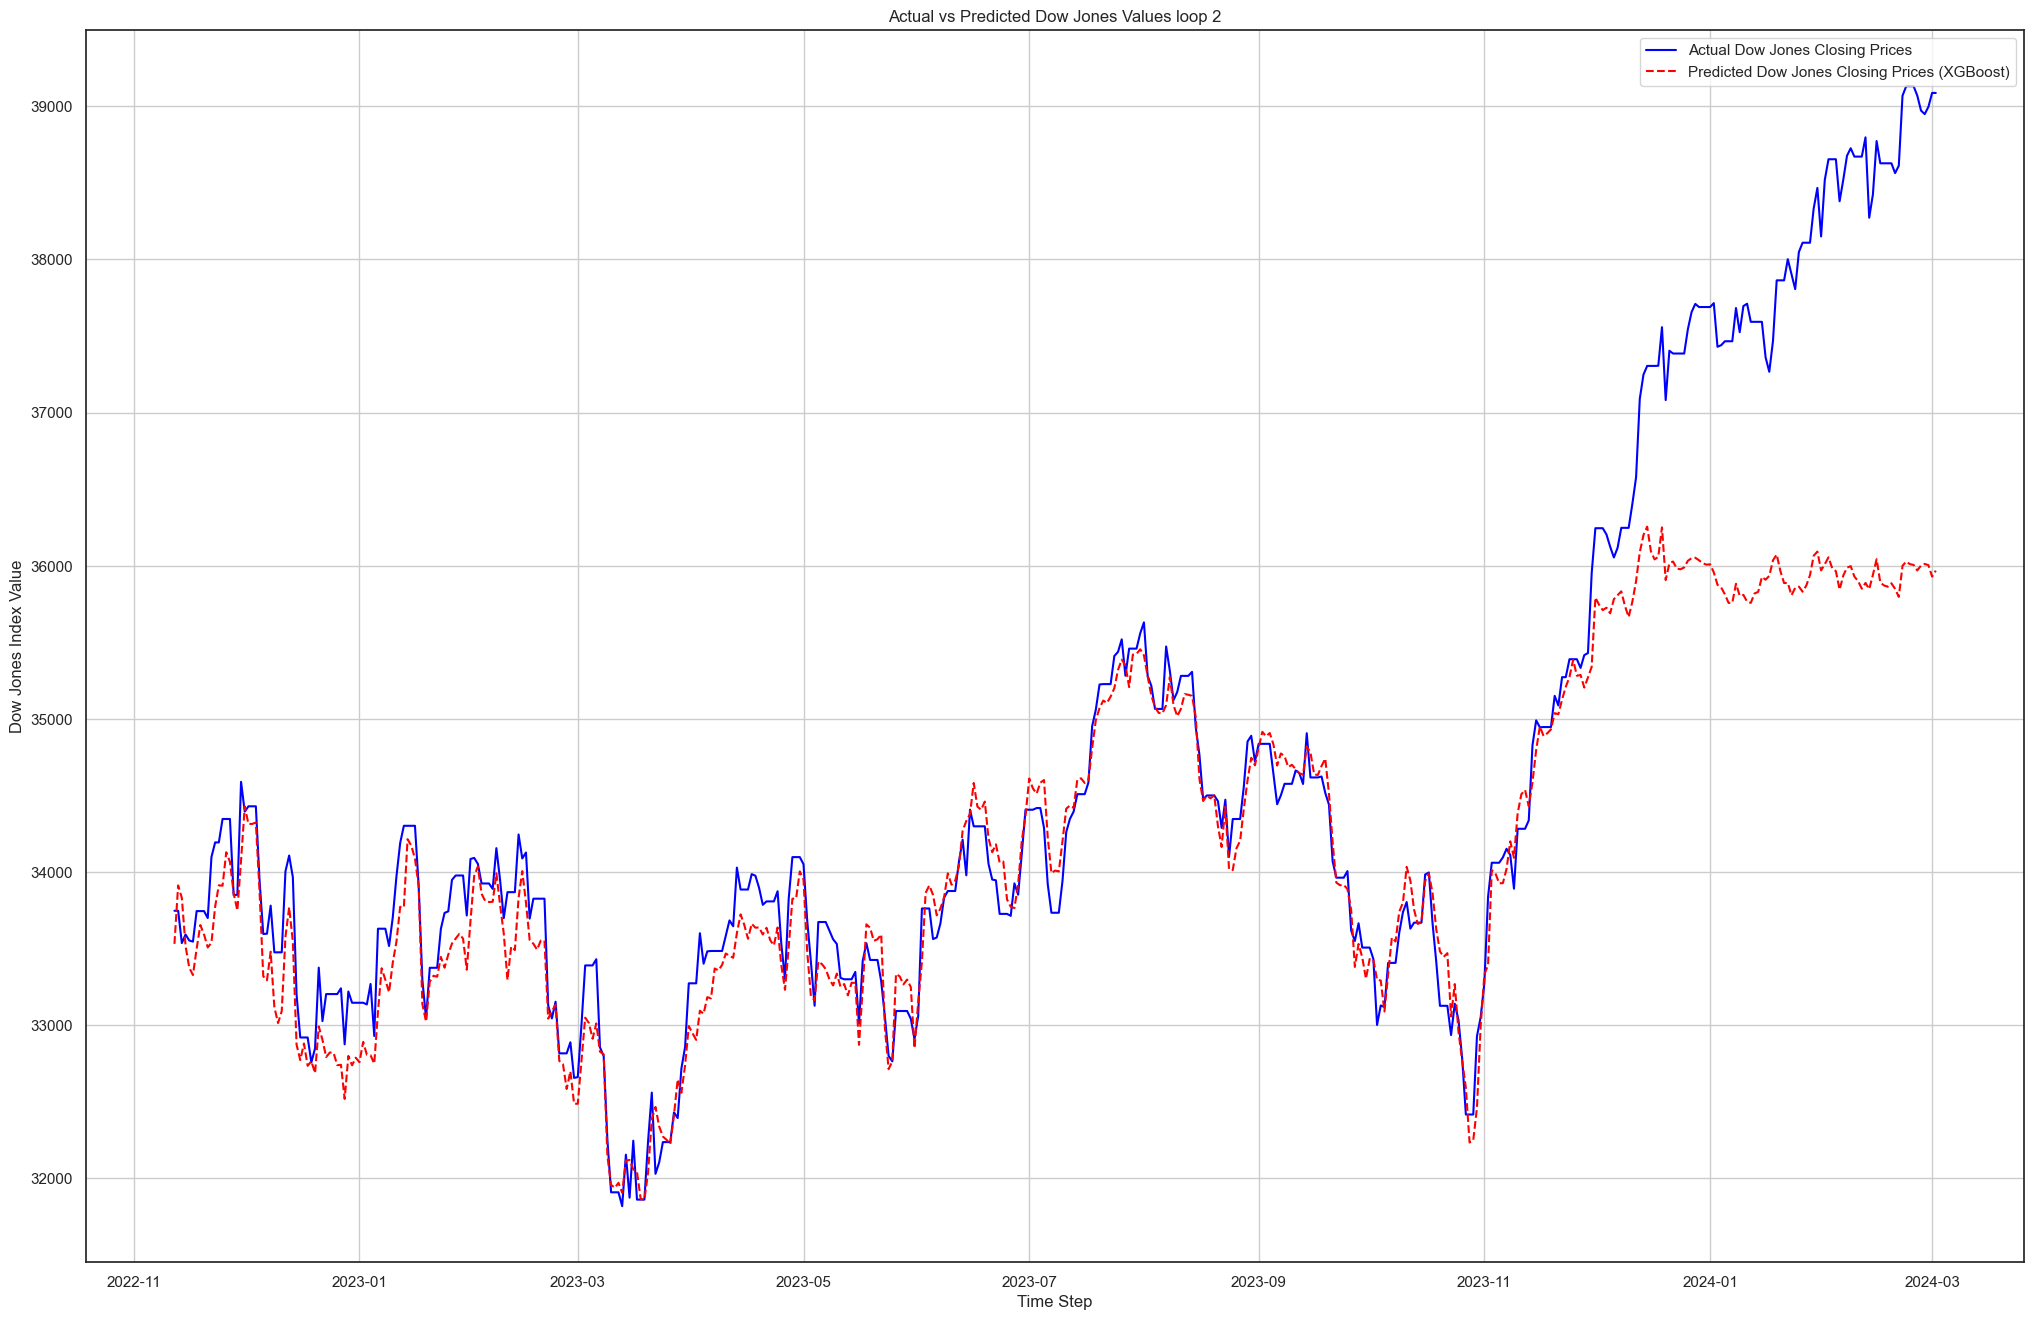

In [ ]:
sns.set(style="white")
plt.figure(figsize=(25, 16))
plt.plot(y_test_l2.index, y_test_l2, label='Actual Dow Jones Closing Prices', linestyle='-', color='blue')
plt.plot(y_test_l2.index, y_pred_l2, label='Predicted Dow Jones Closing Prices (XGBoost)', linestyle='--', color='red')
plt.xlabel("Time Step")
plt.ylabel("Dow Jones Index Value")
plt.title("Actual vs Predicted Dow Jones Values loop 2")
plt.legend()
plt.grid()
plt.savefig('XGBoost_Loop2_Simplemodel_actual_vs_predicted.pdf', format='pdf')
plt.show()

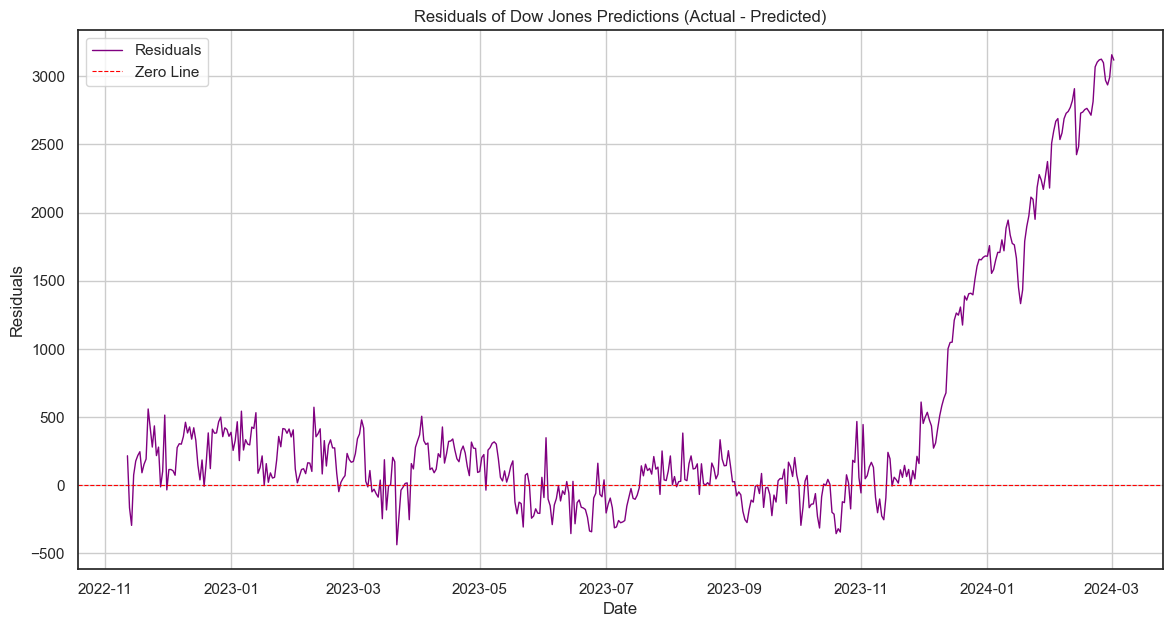

In [166]:
# Calculate residuals (actual - predicted)
residuals_l2 = y_test_l2 - y_pred_l2

# Plot residuals
plt.figure(figsize=(14, 7))
plt.plot(y_test_l2.index, residuals_l2, label='Residuals', color='purple', linewidth=1)
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Zero Line')
plt.title('Residuals of Dow Jones Predictions (Actual - Predicted)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.savefig('residuals_Loop2_XGBoost.pdf', format='pdf')
plt.show()


## Loop 3

In [167]:
df_l3['Date'] = pd.to_datetime(df_l3['Date'])

df_l3.set_index('Date', inplace=True)

/var/folders/nk/5g8df1k14r5f9gfjzz29tky40000gn/T/ipykernel_38049/1654632292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l3['Date'] = pd.to_datetime(df_l3['Date'])


### Building more features to better predict the target

In [ ]:
decomposition = seasonal_decompose(df_l3['Dow_Jones_Target'], model='additive', period=60)

df_l3 = df_l3.copy()
df_l3['Trend'] = decomposition.trend
df_l3['Seasonal'] = decomposition.seasonal
df_l3['Residual'] = decomposition.resid

df_l3.dropna(inplace=True)


# List all columns except the target column 'Dow_Jones_Target'
features = df_l3.columns.tolist()
features.remove('Dow_Jones_Target')


# Exclude weekday-related columns from lagged feature generation
features = [col for col in df_l3.columns if col not in [
    'Weekday_Friday', 'Weekday_Saturday', 'Weekday_Sunday',
    'Weekday_Monday', 'Weekday_Tuesday', 'Weekday_Wednesday', 'Weekday_Thursday',
    'Weekday_Sin', 'Weekday_Cos'
]]

# Create a dictionary to store lagged columns
lagged_features = {}

# Generate lagged features for all columns in 'features' list and target variable
for lag in range(1, 6):
    for feature in features:
        lagged_features[f'{feature}_lag_{lag}'] = df_l3[feature].shift(lag)
    lagged_features[f'Close_lag_{lag}'] = df_l3['Dow_Jones_Target'].shift(lag)

# Concatenate the original dataframe with the new lagged features
df_l3 = pd.concat([df_l3, pd.DataFrame(lagged_features)], axis=1)

df_l3.dropna(inplace=True)



rolling_windows = [7, 30]  # 7-day and 30-day windows
ema_spans = [7, 30]        # EMA with a span of 7 days and 30 days

# Create a copy of the dataframe to avoid modifying the original
df_l3 = df_l3.copy()

# Add rolling averages and exponential moving averages for target variable (Dow_Jones_Target)
for window in rolling_windows:
    df_l3[f'Dow_Jones_Target_roll_avg_{window}'] = df_l3['Dow_Jones_Target'].rolling(window=window).mean()

for span in ema_spans:
    df_l3[f'Dow_Jones_Target_ema_{span}'] = df_l3['Dow_Jones_Target'].ewm(span=span, adjust=False).mean()

key_features = ['SP500', 'NASDAQ', '10yIntRate']  # Add other relevant features as needed -----> 

for feature in key_features:
    for window in rolling_windows:
        df_l3[f'{feature}_roll_avg_{window}'] = df_l3[feature].rolling(window=window).mean()
    for span in ema_spans:
        df_l3[f'{feature}_ema_{span}'] = df_l3[feature].ewm(span=span, adjust=False).mean()

df_l3.dropna(inplace=True)



# Make a copy of the DataFrame to avoid modifying the original
df_l3 = df_l3.copy()

# Calculate 50-day and 200-day moving averages for Dow Jones Target
df_l3['Dow_Jones_50_day_MA'] = df_l3['Dow_Jones_Target'].rolling(window=50).mean()
df_l3['Dow_Jones_200_day_MA'] = df_l3['Dow_Jones_Target'].rolling(window=200).mean()

# Function to calculate Relative Strength Index (RSI)
def calculate_rsi(series, window=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI with a 14-day window (typical for RSI calculations)
df_l3['Dow_Jones_RSI_14'] = calculate_rsi(df_l3['Dow_Jones_Target'], window=14)

df_l3.dropna(inplace=True)


### Train / Test Split

In [169]:
train_size = int(len(df_l3) * 0.85)
train = df_l3.iloc[:train_size]
test = df_l3.iloc[train_size:]

# Features and target
X_train_l3 = train.drop(columns=['Dow_Jones_Target'])
y_train_l3 = train['Dow_Jones_Target']
X_test_l3 = test.drop(columns=['Dow_Jones_Target'])
y_test_l3 = test['Dow_Jones_Target']

### Applying the Model

In [170]:
# model accoring to the best hyperparameters
xg_reg_l3 = xgb.XGBRegressor(
    objective='reg:squarederror',
    subsample=1.0,
    reg_lambda=2,
    reg_aplha=0,
    n_estimators=500,
    min_child_weight=5,
    max_depth=20,
    learning_rate=0.1,
    gamma=0.2,
    colsample_bytree=0.6,
    random_state=42
)


# Fit the XGBoost model
xg_reg_l3.fit(X_train_l3, y_train_l3)

/Users/maxquarder/.pyenv/versions/3.11.6/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "reg_aplha" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [171]:
# Make predictions
y_pred_l3 = xg_reg_l3.predict(X_test_l3)

#xg_reg.save_model('xgboost_model_loop2.json')

metrics_l3 = evaluate_regression(y_test_l3, y_pred_l3)

Mean Absolute Error (MAE): 498.48340457940276
Mean Squared Error (MSE): 820761.1596761293
Root Mean Squared Error (RMSE): 905.9586964515156
Mean Absolute Percentage Error (MAPE): 1.35%


### Plots

/var/folders/nk/5g8df1k14r5f9gfjzz29tky40000gn/T/ipykernel_38049/2457638317.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y=feature_importances_l3.index, data=feature_importances_l3, palette='viridis')


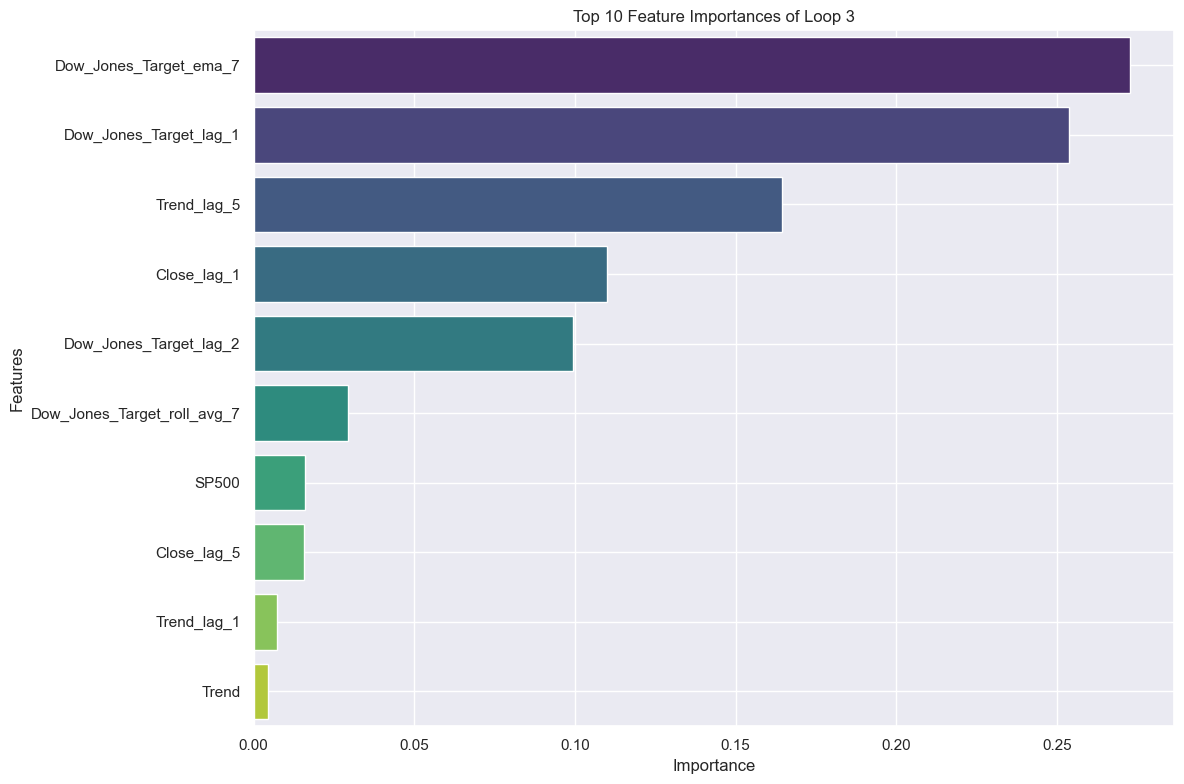

In [ ]:
feature_importances_l3 = pd.DataFrame(data=xg_reg_l3.feature_importances_,
                                   index=X_train_l3.columns,
                                   columns=['importance']).sort_values('importance', ascending=False).head(10)


sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y=feature_importances_l3.index, data=feature_importances_l3, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances of Loop 3')
plt.grid(True)
plt.tight_layout()
plt.savefig('feature_importances_XGBoost_loop3.pdf', format='pdf', bbox_inches='tight')
plt.show()


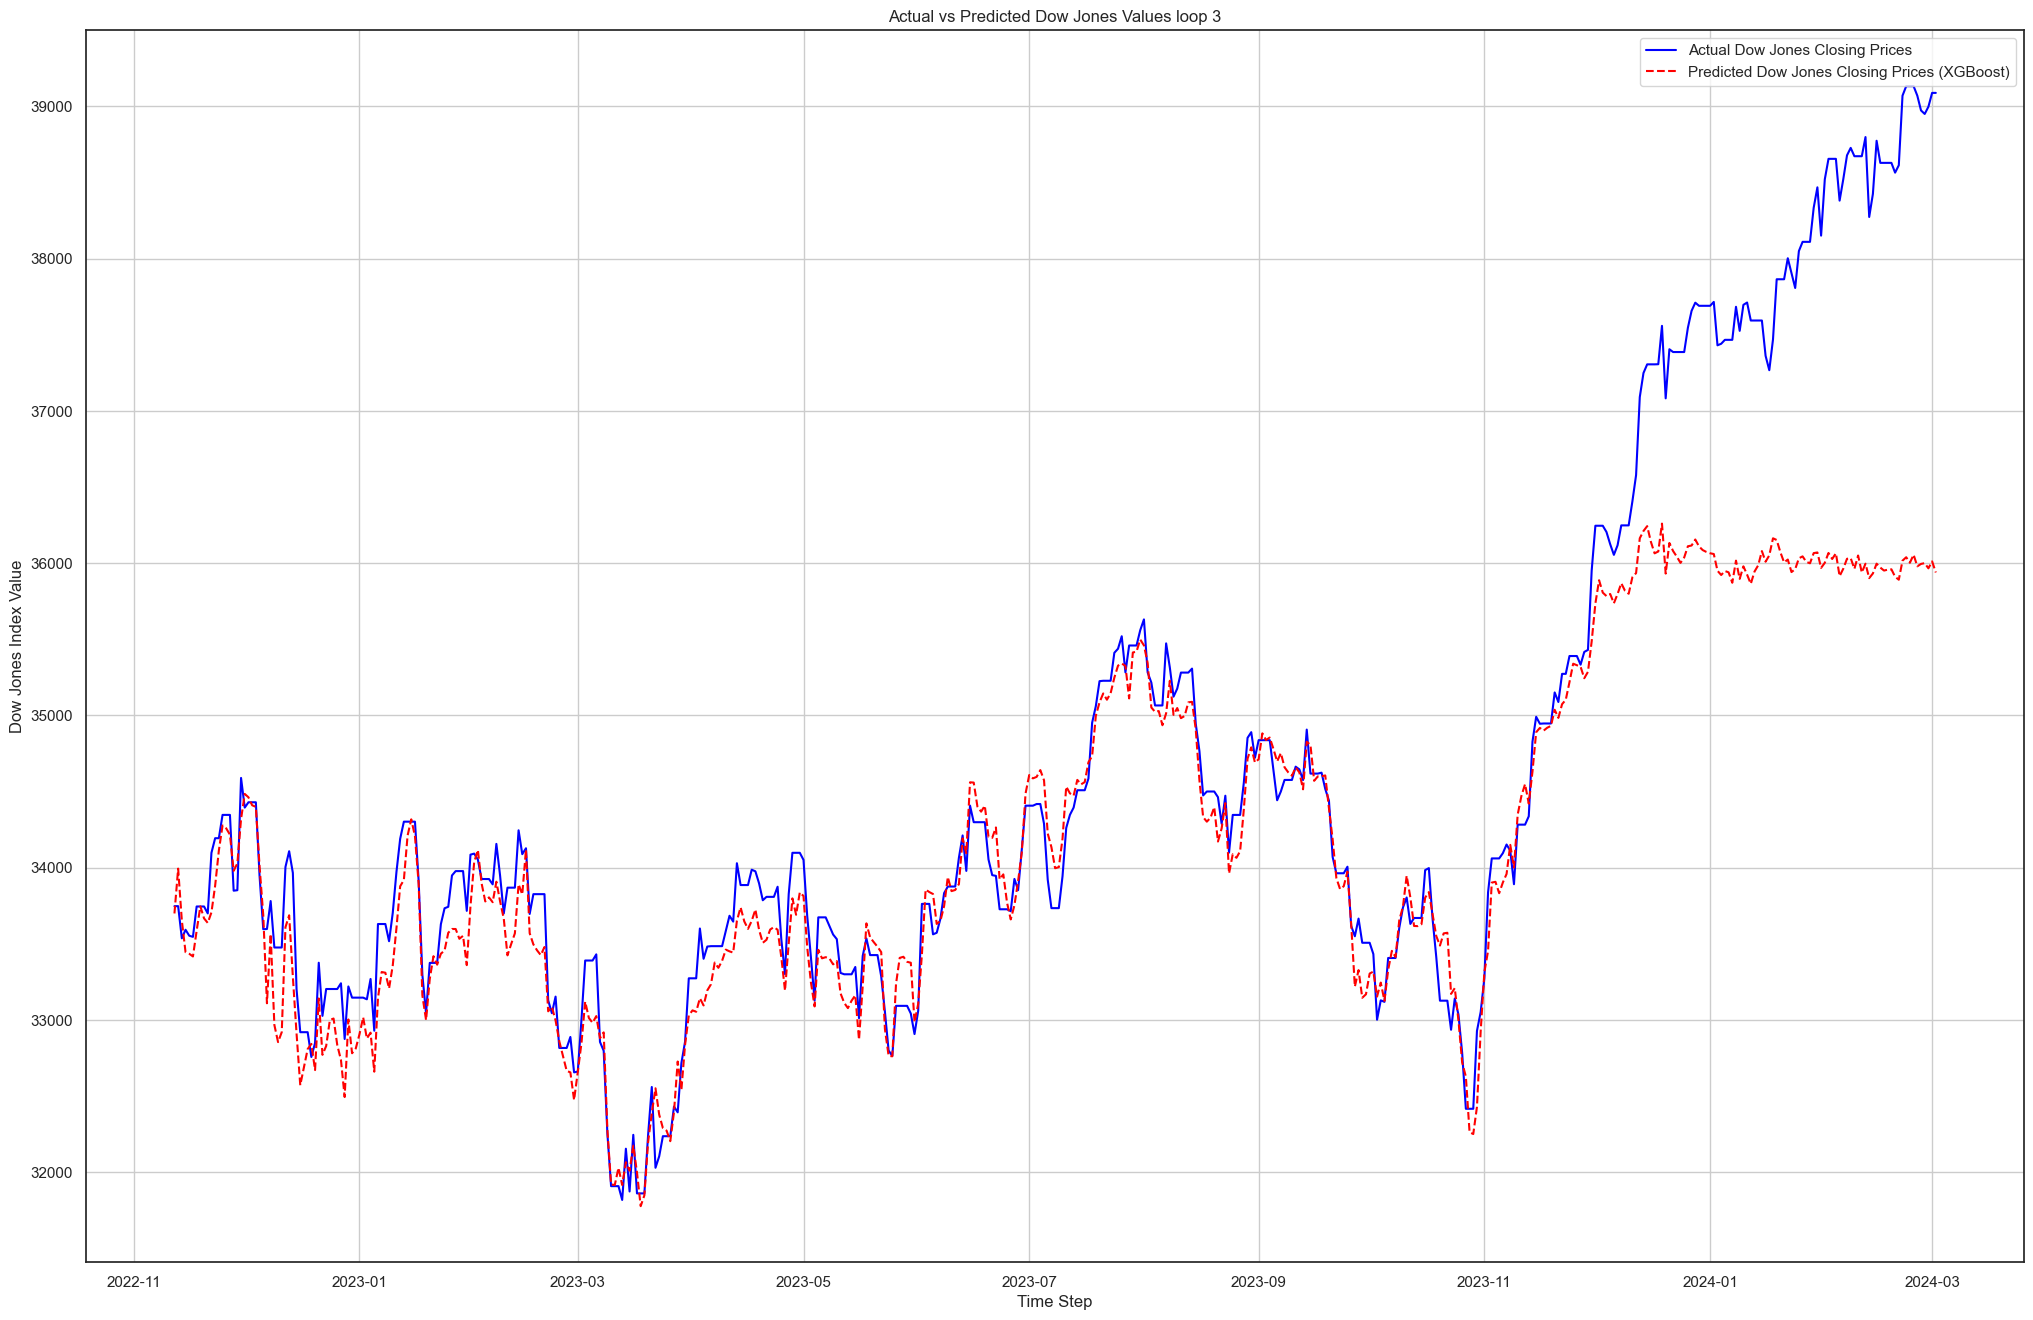

In [ ]:
sns.set(style="white")
plt.figure(figsize=(25, 16))
plt.plot(y_test_l3.index, y_test_l3, label='Actual Dow Jones Closing Prices', linestyle='-', color='blue')
plt.plot(y_test_l3.index, y_pred_l3, label='Predicted Dow Jones Closing Prices (XGBoost)', linestyle='--', color='red')
plt.xlabel("Time Step")
plt.ylabel("Dow Jones Index Value")
plt.title("Actual vs Predicted Dow Jones Values loop 3")
plt.legend()
plt.grid()
plt.savefig('XGBoost_Loop3_Simplemodel_actual_vs_predicted.pdf', format='pdf')
plt.show()

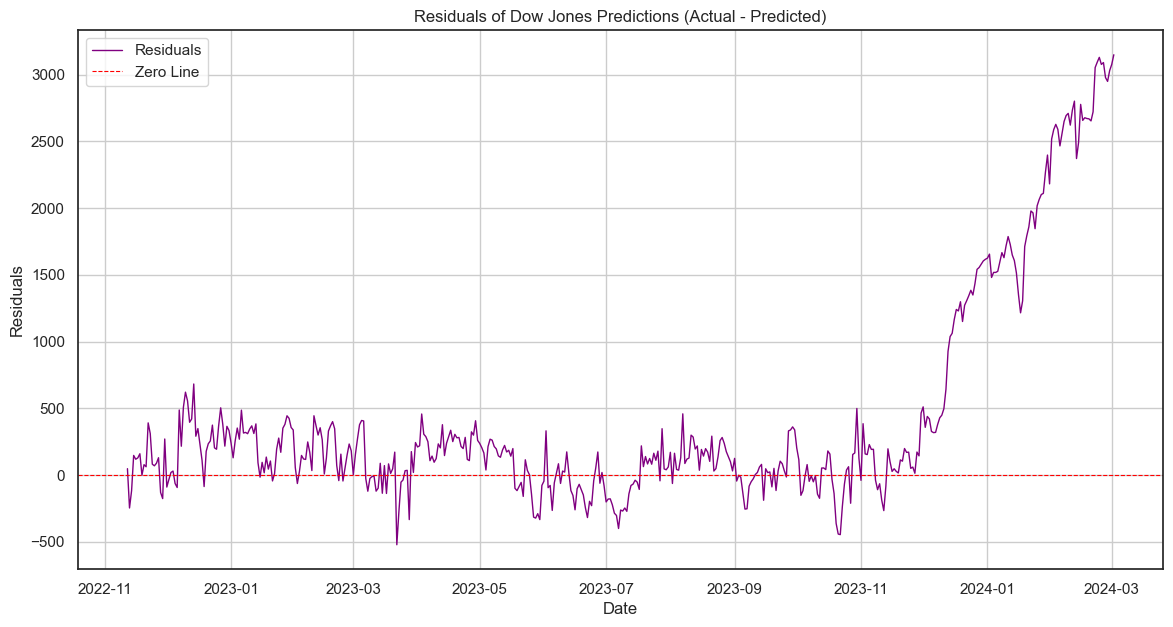

In [174]:
# Calculate residuals (actual - predicted)
residual_l3 = y_test_l3 - y_pred_l3

# Plot residuals
plt.figure(figsize=(14, 7))
plt.plot(y_test_l3.index, residual_l3, label='Residuals', color='purple', linewidth=1)
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Zero Line')
plt.title('Residuals of Dow Jones Predictions (Actual - Predicted)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.savefig('residuals_Loop3_XGBoost.pdf', format='pdf')
plt.show()


## Loop 4

In [175]:
df_l4['Date'] = pd.to_datetime(df_l4['Date'])

df_l4.set_index('Date', inplace=True)

/var/folders/nk/5g8df1k14r5f9gfjzz29tky40000gn/T/ipykernel_38049/3870899863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l4['Date'] = pd.to_datetime(df_l4['Date'])


### Building more features to better predict the target

In [ ]:
decomposition = seasonal_decompose(df_l4['Dow_Jones_Target'], model='additive', period=60)

df_l4 = df_l4.copy()
df_l4['Trend'] = decomposition.trend
df_l4['Seasonal'] = decomposition.seasonal
df_l4['Residual'] = decomposition.resid

df_l4.dropna(inplace=True)


# List all columns except the target column 'Dow_Jones_Target'
features = df_l4.columns.tolist()
features.remove('Dow_Jones_Target')


# Exclude weekday-related columns from lagged feature generation
features = [col for col in df_l4.columns if col not in [
    'Weekday_Friday', 'Weekday_Saturday', 'Weekday_Sunday',
    'Weekday_Monday', 'Weekday_Tuesday', 'Weekday_Wednesday', 'Weekday_Thursday',
    'Weekday_Sin', 'Weekday_Cos'
]]

# Create a dictionary to store lagged columns
lagged_features = {}

# Generate lagged features for all columns in 'features' list and target variable
for lag in range(1, 6):
    for feature in features:
        lagged_features[f'{feature}_lag_{lag}'] = df_l4[feature].shift(lag)
    lagged_features[f'Close_lag_{lag}'] = df_l4['Dow_Jones_Target'].shift(lag)

# Concatenate the original dataframe with the new lagged features
df_l4 = pd.concat([df_l4, pd.DataFrame(lagged_features)], axis=1)

df_l4.dropna(inplace=True)



rolling_windows = [7, 30]  # 7-day and 30-day windows
ema_spans = [7, 30]        # EMA with a span of 7 days and 30 days

# Create a copy of the dataframe to avoid modifying the original
df_l4 = df_l4.copy()

# Add rolling averages and exponential moving averages for target variable (Dow_Jones_Target)
for window in rolling_windows:
    df_l4[f'Dow_Jones_Target_roll_avg_{window}'] = df_l4['Dow_Jones_Target'].rolling(window=window).mean()

for span in ema_spans:
    df_l4[f'Dow_Jones_Target_ema_{span}'] = df_l4['Dow_Jones_Target'].ewm(span=span, adjust=False).mean()

key_features = ['SP500', 'NASDAQ', '10yIntRate']  # Add other relevant features as needed -----> 

for feature in key_features:
    for window in rolling_windows:
        df_l4[f'{feature}_roll_avg_{window}'] = df_l4[feature].rolling(window=window).mean()
    for span in ema_spans:
        df_l4[f'{feature}_ema_{span}'] = df_l4[feature].ewm(span=span, adjust=False).mean()

df_l4.dropna(inplace=True)



df_l4 = df_l4.copy()

# Calculate 50-day and 200-day moving averages for Dow Jones Target
df_l4['Dow_Jones_50_day_MA'] = df_l4['Dow_Jones_Target'].rolling(window=50).mean()
df_l4['Dow_Jones_200_day_MA'] = df_l4['Dow_Jones_Target'].rolling(window=200).mean()

# Function to calculate Relative Strength Index (RSI)
def calculate_rsi(series, window=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI with a 14-day window (typical for RSI calculations)
df_l4['Dow_Jones_RSI_14'] = calculate_rsi(df_l4['Dow_Jones_Target'], window=14)

df_l4.dropna(inplace=True)


### Train / Test Split

In [177]:
train_size = int(len(df_l4) * 0.85)
train = df_l4.iloc[:train_size]
test = df_l4.iloc[train_size:]

# Features and target
X_train_l4 = train.drop(columns=['Dow_Jones_Target'])
y_train_l4 = train['Dow_Jones_Target']
X_test_l4 = test.drop(columns=['Dow_Jones_Target'])
y_test_l4 = test['Dow_Jones_Target']

### Applying the Model

In [178]:
# model accoring to the best hyperparameters
xg_reg_l4 = xgb.XGBRegressor(
    objective='reg:squarederror',
    subsample=1.0,
    reg_lambda=2,
    reg_aplha=0,
    n_estimators=500,
    min_child_weight=5,
    max_depth=20,
    learning_rate=0.1,
    gamma=0.2,
    colsample_bytree=0.6,
    random_state=42
)


# Fit the XGBoost model
xg_reg_l4.fit(X_train_l4, y_train_l4)

/Users/maxquarder/.pyenv/versions/3.11.6/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:41:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "reg_aplha" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [179]:
# Make predictions
y_pred_l4 = xg_reg_l4.predict(X_test_l4)

#xg_reg.save_model('xgboost_model_loop2.json')

metrics_l4 = evaluate_regression(y_test_l4, y_pred_l4)

Mean Absolute Error (MAE): 808.0484727202874
Mean Squared Error (MSE): 1626842.4899079385
Root Mean Squared Error (RMSE): 1275.4773576618045
Mean Absolute Percentage Error (MAPE): 2.14%


### Plots

/var/folders/nk/5g8df1k14r5f9gfjzz29tky40000gn/T/ipykernel_38049/2070509727.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y=feature_importances_l4.index, data=feature_importances_l4, palette='viridis')


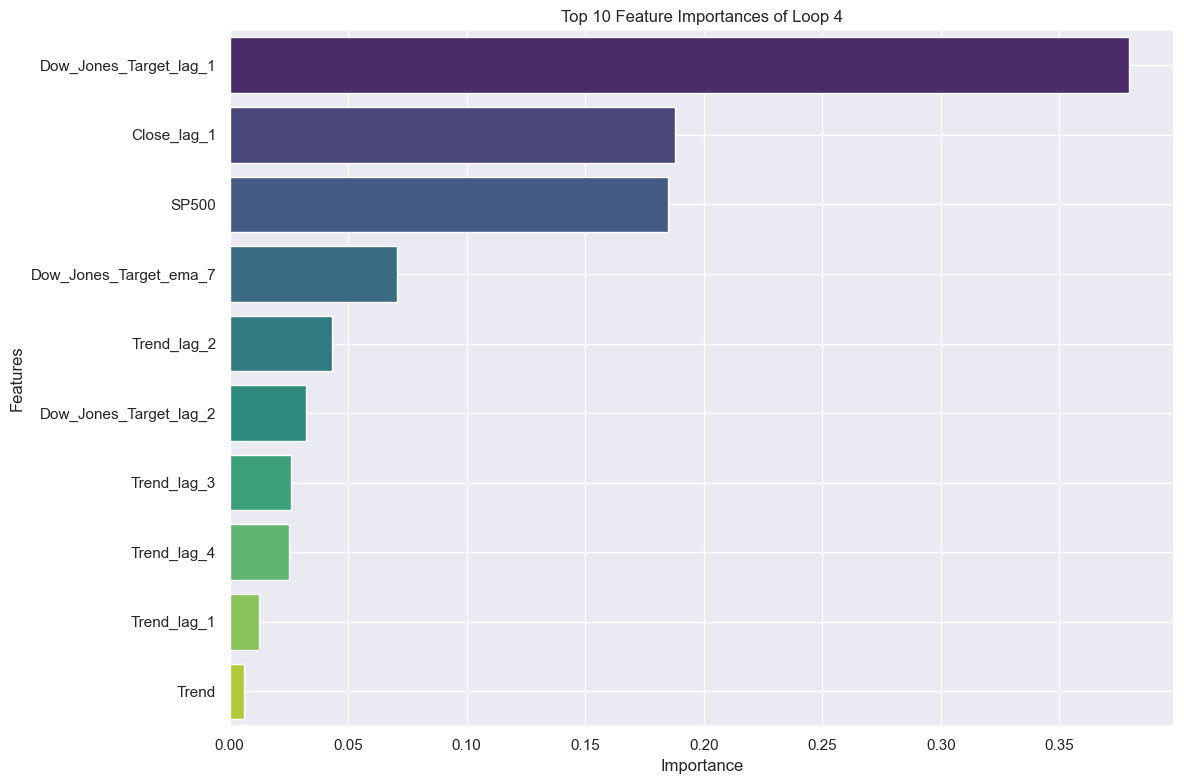

In [ ]:
feature_importances_l4 = pd.DataFrame(data=xg_reg_l4.feature_importances_,
                                   index=X_train_l4.columns,
                                   columns=['importance']).sort_values('importance', ascending=False).head(10)


sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y=feature_importances_l4.index, data=feature_importances_l4, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances of Loop 4')
plt.grid(True)
plt.tight_layout()
plt.savefig('feature_importances_XGBoost_loop4.pdf', format='pdf', bbox_inches='tight')
plt.show()


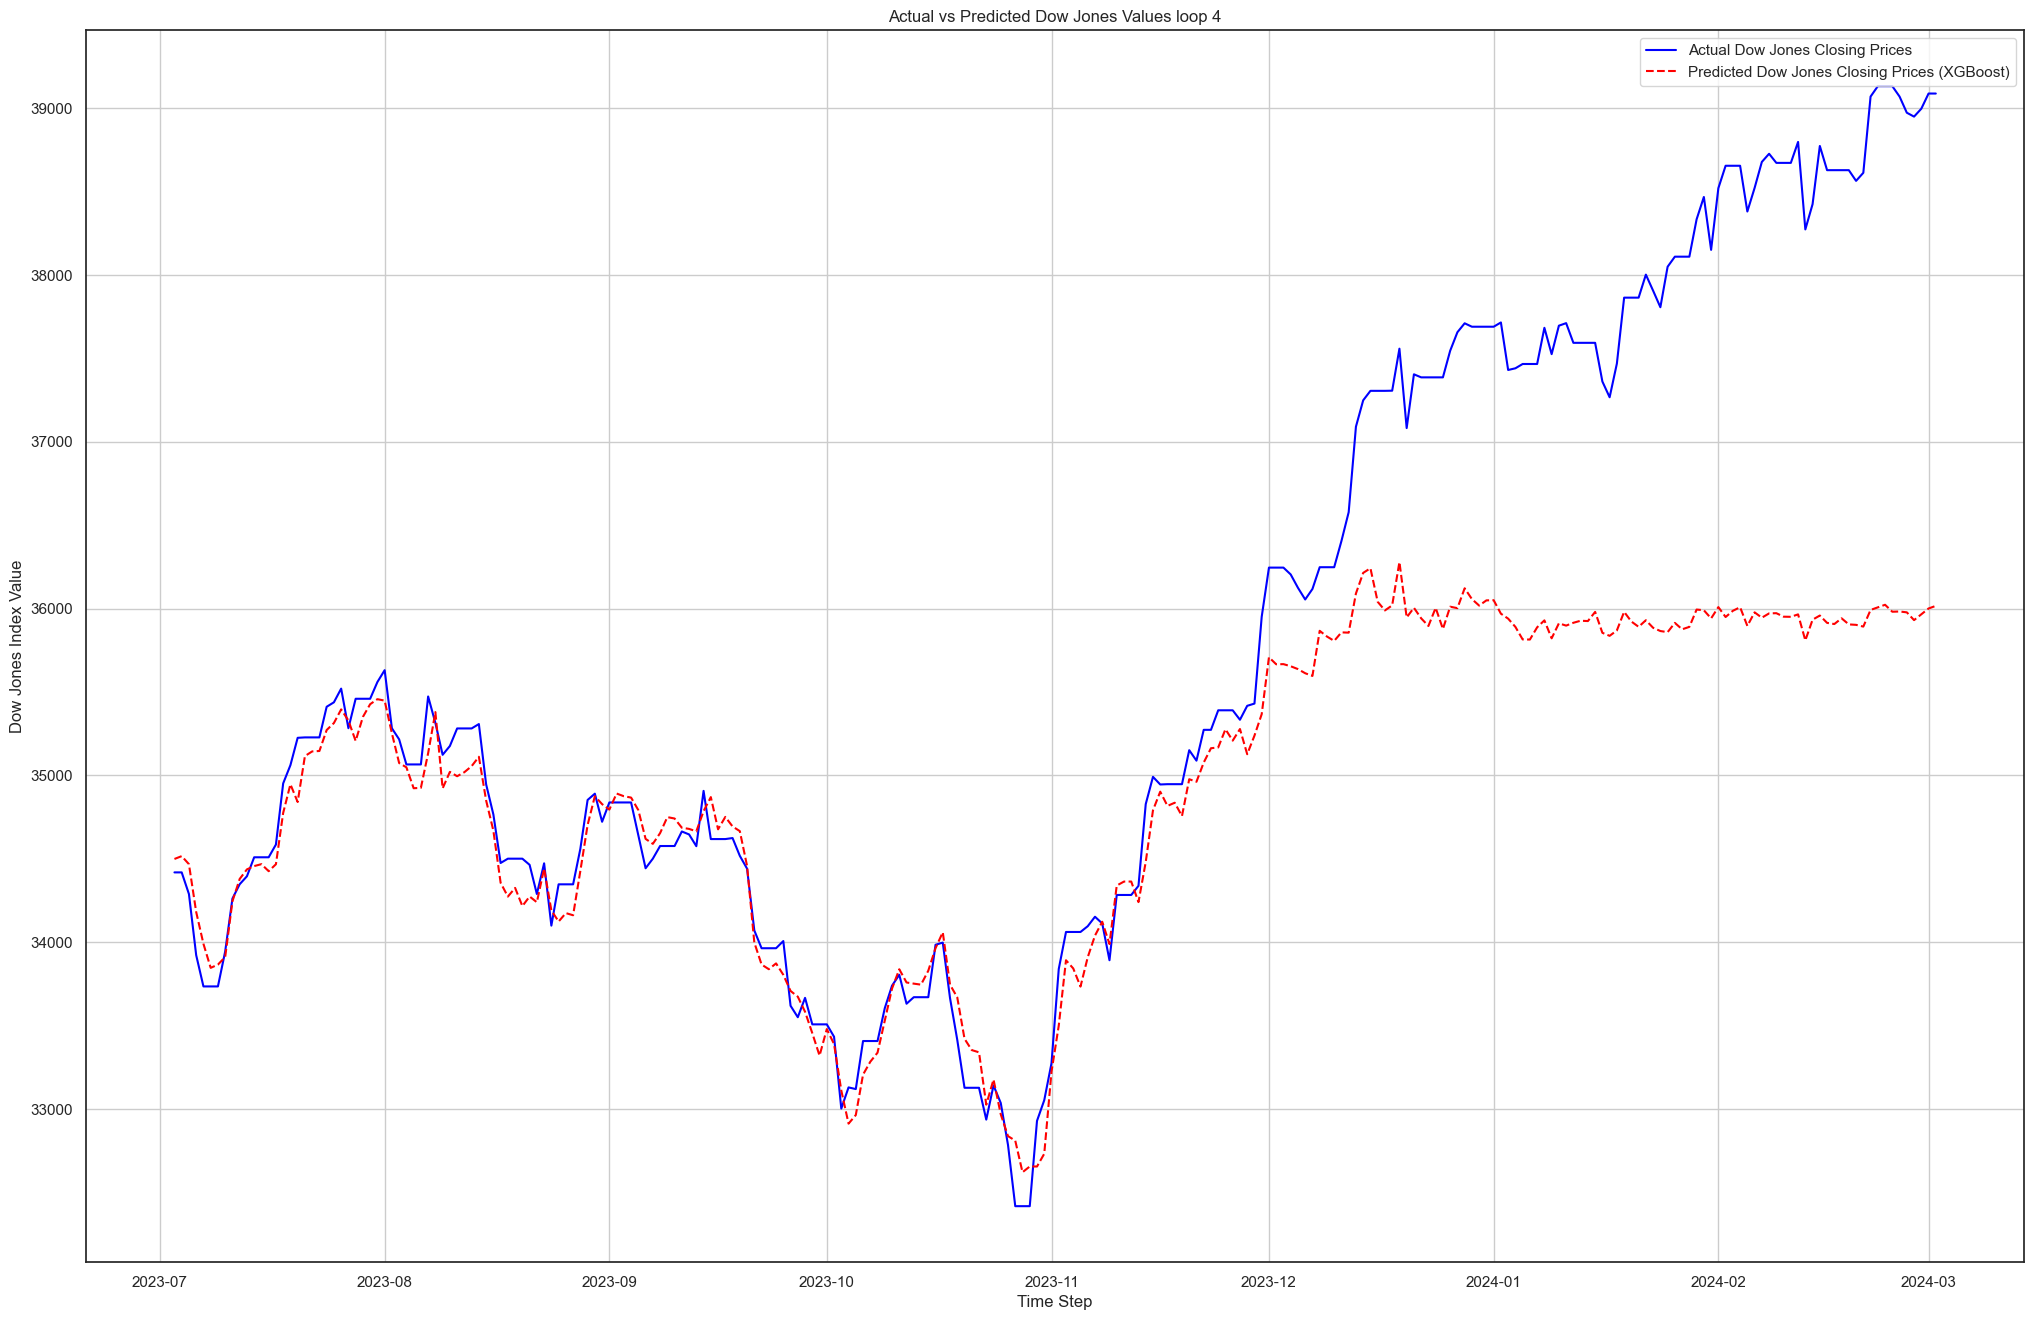

In [ ]:
sns.set(style="white")
plt.figure(figsize=(25, 16))
plt.plot(y_test_l4.index, y_test_l4, label='Actual Dow Jones Closing Prices', linestyle='-', color='blue')
plt.plot(y_test_l4.index, y_pred_l4, label='Predicted Dow Jones Closing Prices (XGBoost)', linestyle='--', color='red')
plt.xlabel("Time Step")
plt.ylabel("Dow Jones Index Value")
plt.title("Actual vs Predicted Dow Jones Values loop 4")
plt.legend()
plt.grid()
plt.savefig('XGBoost_Loop4_Simplemodel_actual_vs_predicted.pdf', format='pdf')
plt.show()

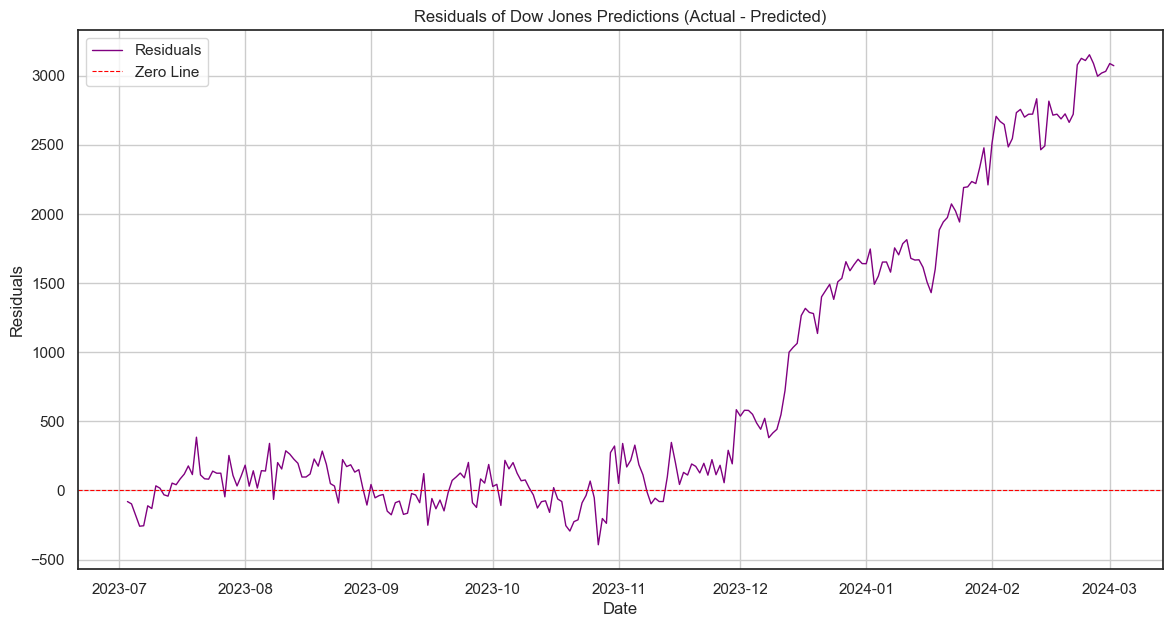

In [ ]:
# Calculate residuals (actual - predicted)
residuals_l4 = y_test_l4 - y_pred_l4

# Plot residuals
plt.figure(figsize=(14, 7))
plt.plot(y_test_l4.index, residuals_l4, label='Residuals', color='purple', linewidth=1)
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Zero Line')
plt.title('Residuals of Dow Jones Predictions (Actual - Predicted)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.savefig('residuals_Loop4_XGBoost.pdf', format='pdf')
plt.show()

## Plots of all Loops

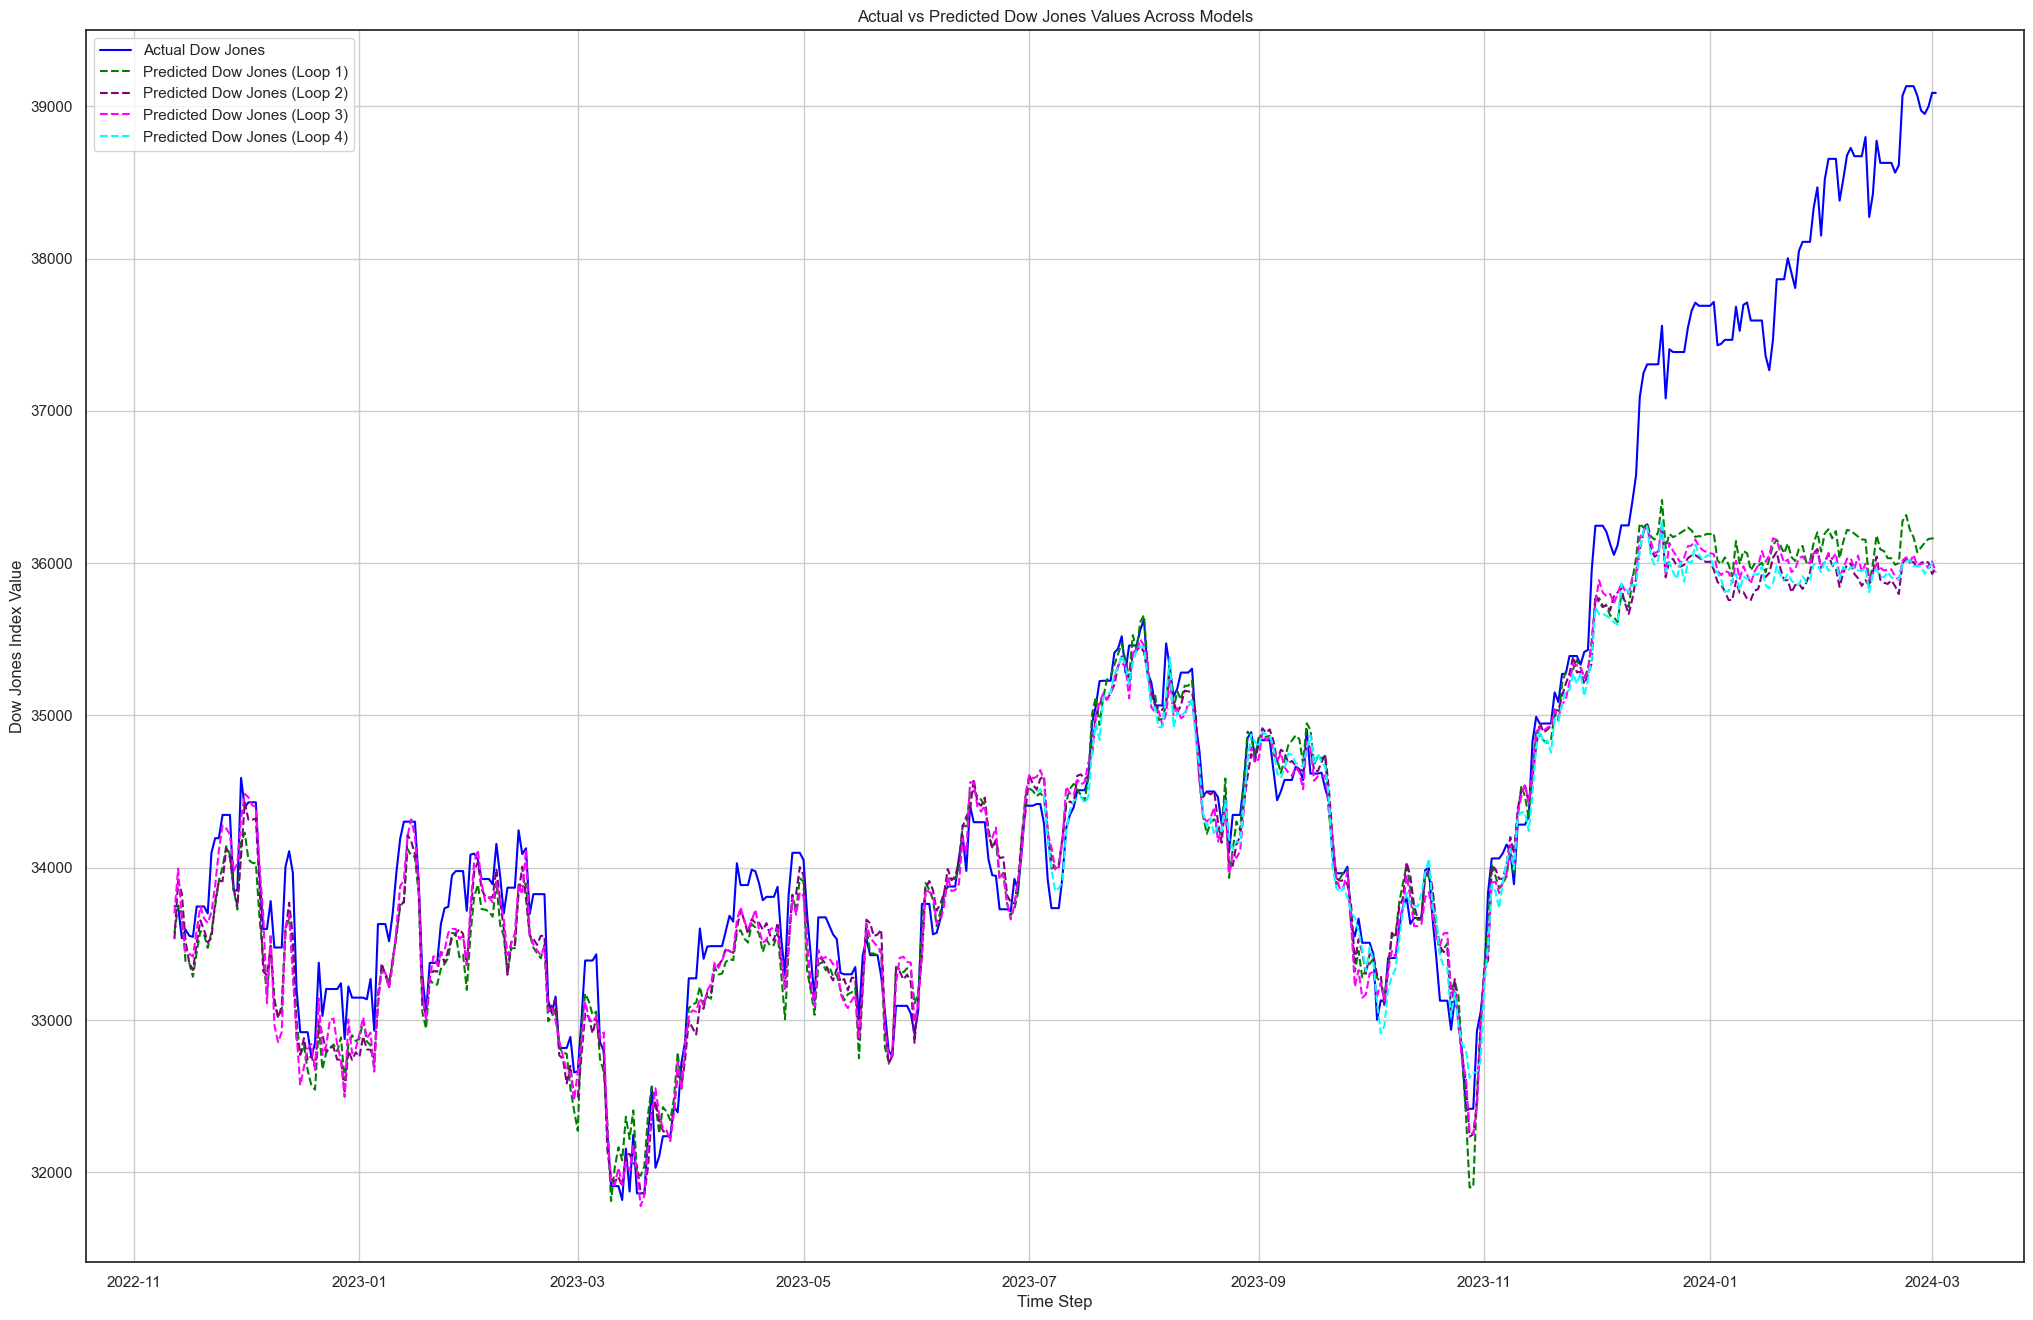

In [ ]:
sns.set(style="white")

plt.figure(figsize=(25, 16))

# Loop 1
plt.plot(y_test.index, y_test, label='Actual Dow Jones', linestyle='-', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Dow Jones (Loop 1)', linestyle='--', color='green')

# Loop 2
#plt.plot(y_test_l2.index, y_test_l2, label='Actual Dow Jones (Loop 2)', linestyle='-', color='cyan')
plt.plot(y_test_l2.index, y_pred_l2, label='Predicted Dow Jones (Loop 2)', linestyle='--', color='purple')

# Loop 3
#plt.plot(y_test_l3.index, y_test_l3, label='Actual Dow Jones (Loop 3)', linestyle='-', color='orange')
plt.plot(y_test_l3.index, y_pred_l3, label='Predicted Dow Jones (Loop 3)', linestyle='--', color='magenta')

# Loop 4
#plt.plot(y_test_l4.index, y_test_l4, label='Actual Dow Jones (Loop 4)', linestyle='-', color='red')
plt.plot(y_test_l4.index, y_pred_l4, label='Predicted Dow Jones (Loop 4)', linestyle='--', color='cyan')


plt.xlabel("Time Step")
plt.ylabel("Dow Jones Index Value")
plt.title("Actual vs Predicted Dow Jones Values Across Models")
plt.legend()
plt.grid()
plt.savefig('XGBoost_Actual_vs_Predicted_AllLoops.pdf', format='pdf')
plt.show()


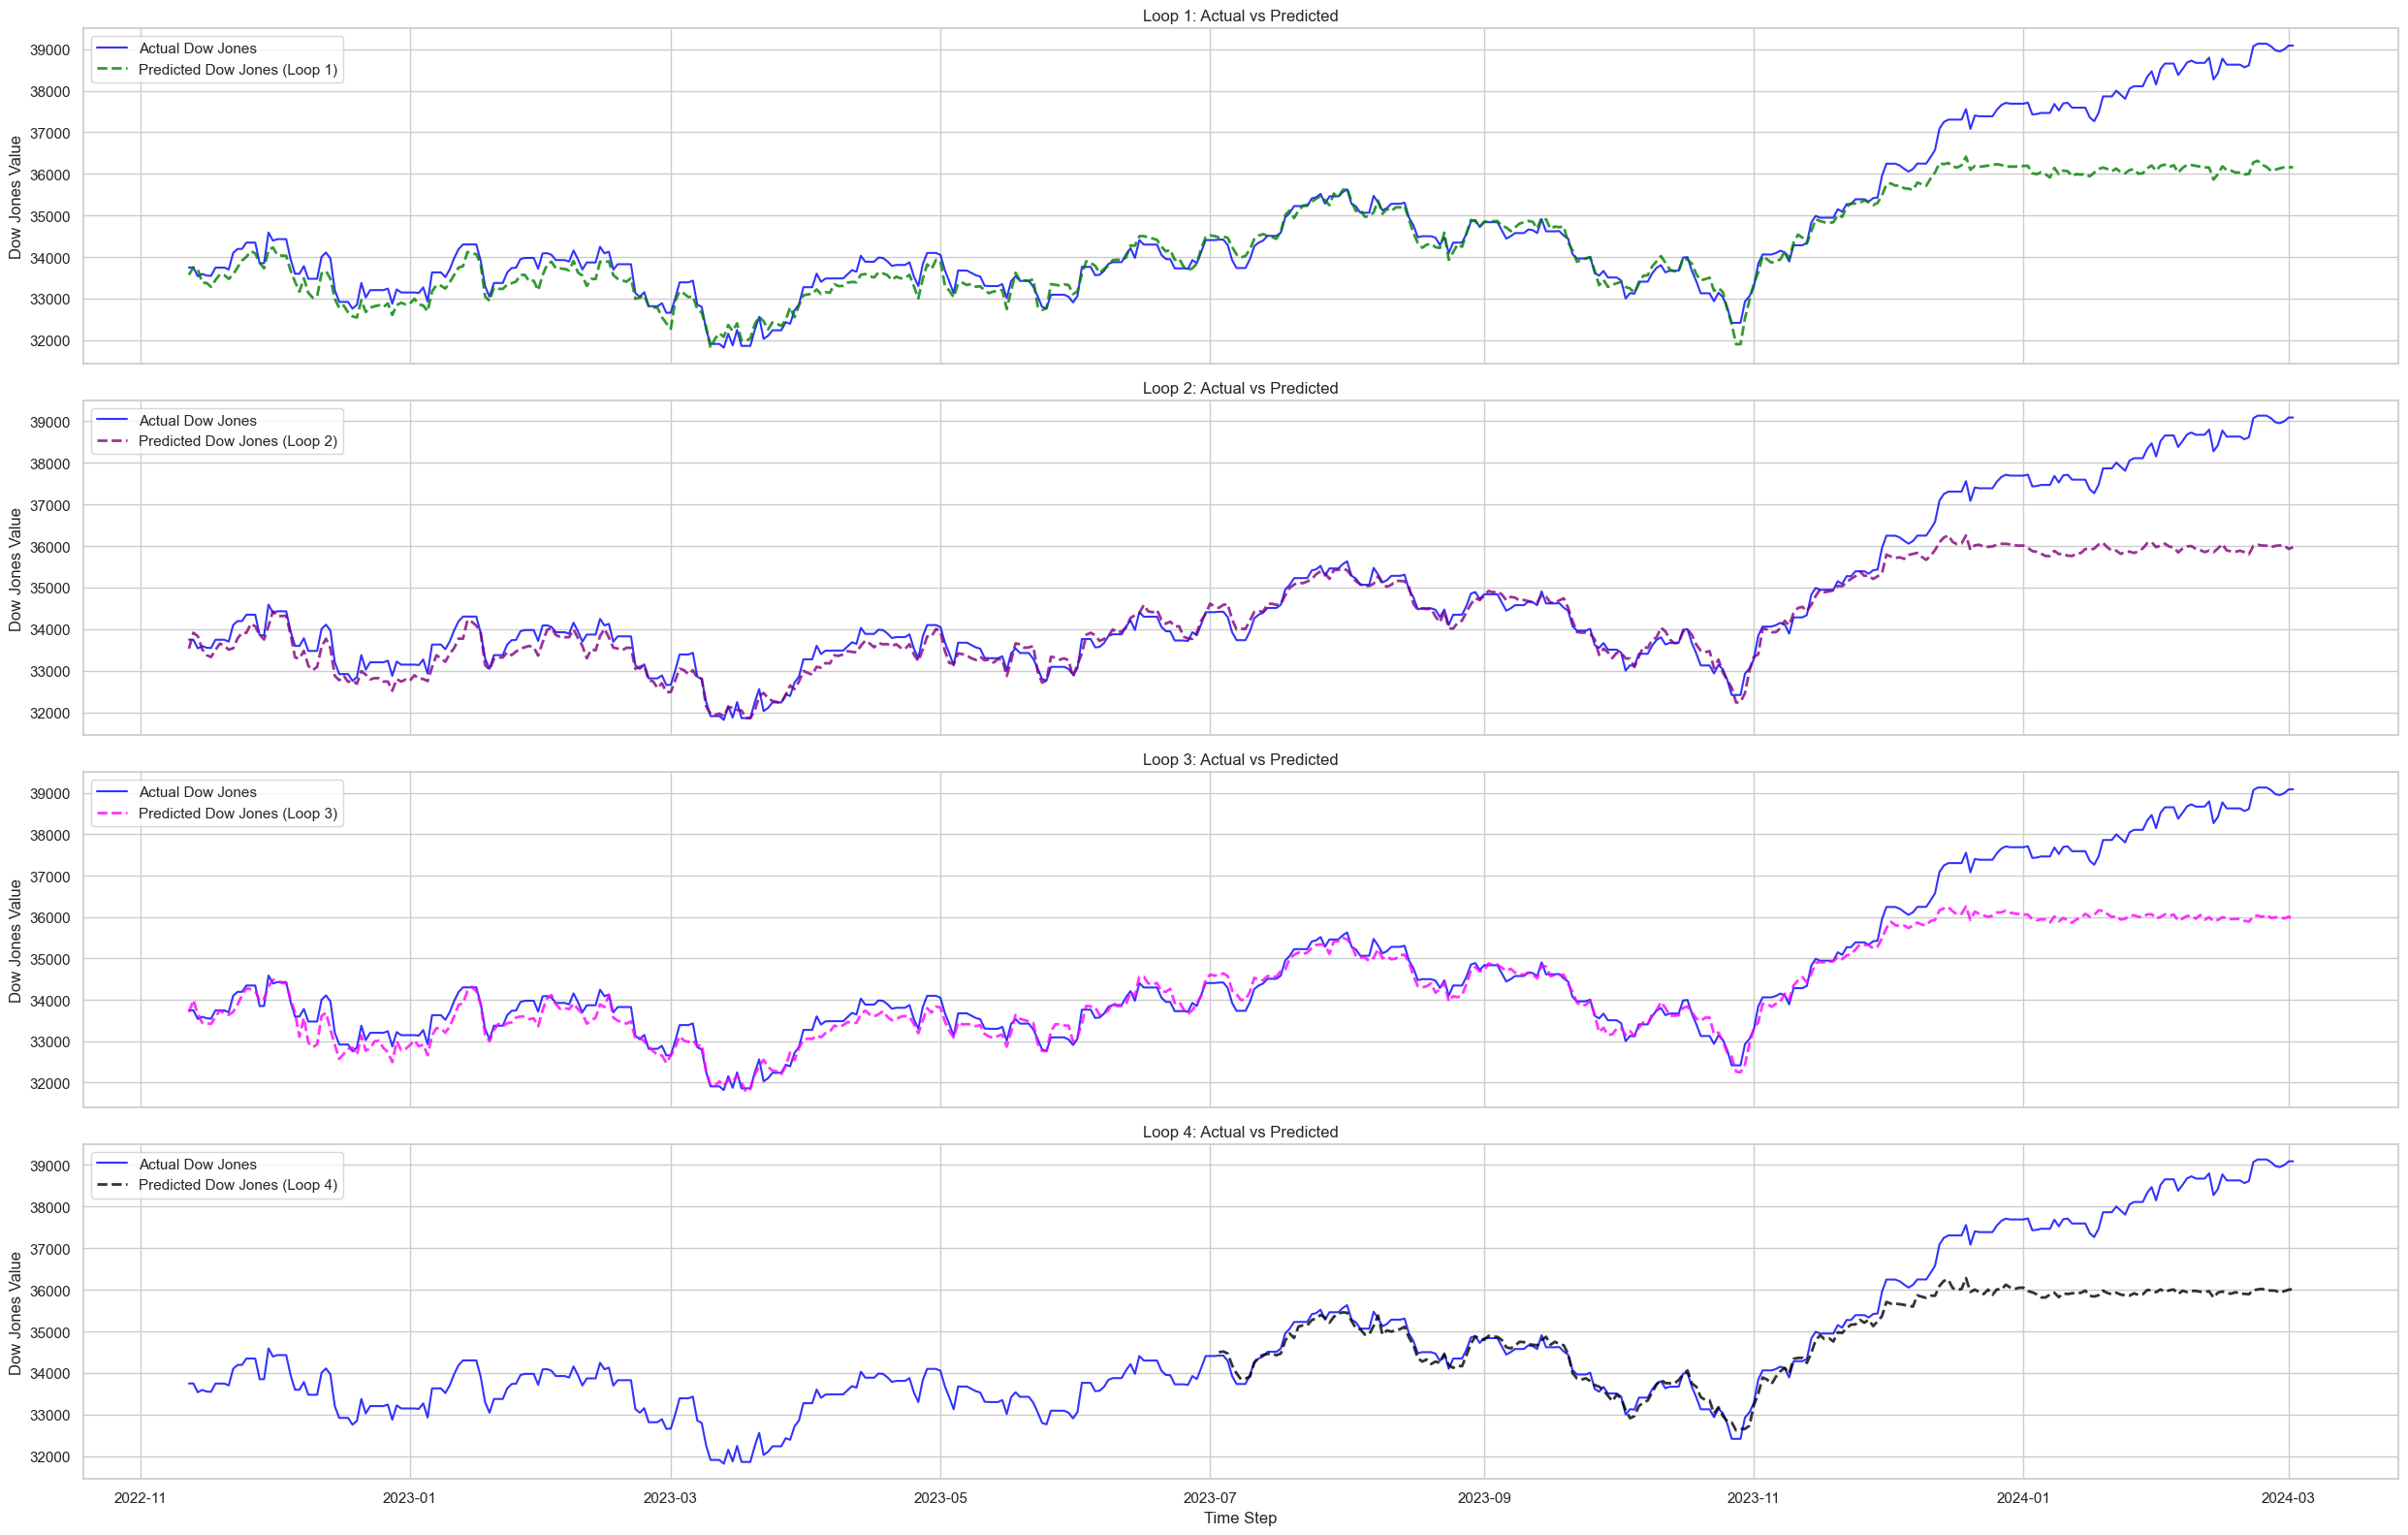

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(4, 1, figsize=(25, 16), sharex=True)

# Loop 1
axes[0].plot(y_test.index, y_test, label='Actual Dow Jones', linestyle='-', color='blue', alpha=0.8)
axes[0].plot(y_test.index, y_pred, label='Predicted Dow Jones (Loop 1)', linestyle='--', color='green', alpha=0.8, linewidth=2)
axes[0].set_title("Loop 1: Actual vs Predicted")

# Loop 2
axes[1].plot(y_test.index, y_test, label='Actual Dow Jones', linestyle='-', color='blue', alpha=0.8)
axes[1].plot(y_test_l2.index, y_pred_l2, label='Predicted Dow Jones (Loop 2)', linestyle='--', color='purple', alpha=0.8, linewidth=2)
axes[1].set_title("Loop 2: Actual vs Predicted")

# Loop 3
axes[2].plot(y_test.index, y_test, label='Actual Dow Jones', linestyle='-', color='blue', alpha=0.8)
axes[2].plot(y_test_l3.index, y_pred_l3, label='Predicted Dow Jones (Loop 3)', linestyle='--', color='magenta', alpha=0.8, linewidth=2)
axes[2].set_title("Loop 3: Actual vs Predicted")

# Loop 4
axes[3].plot(y_test.index, y_test, label='Actual Dow Jones', linestyle='-', color='blue', alpha=0.8)
axes[3].plot(y_test_l4.index, y_pred_l4, label='Predicted Dow Jones (Loop 4)', linestyle='--', color='black', alpha=0.8, linewidth=2)
axes[3].set_title("Loop 4: Actual vs Predicted")

# General adjustments
for ax in axes:
    ax.legend()
    ax.grid(True)
    ax.set_ylabel("Dow Jones Value")

axes[-1].set_xlabel("Time Step")
plt.tight_layout()
plt.savefig('XGBoost_Actual_vs_Predicted_AllLoops_Separate.pdf', format='pdf')
plt.show()


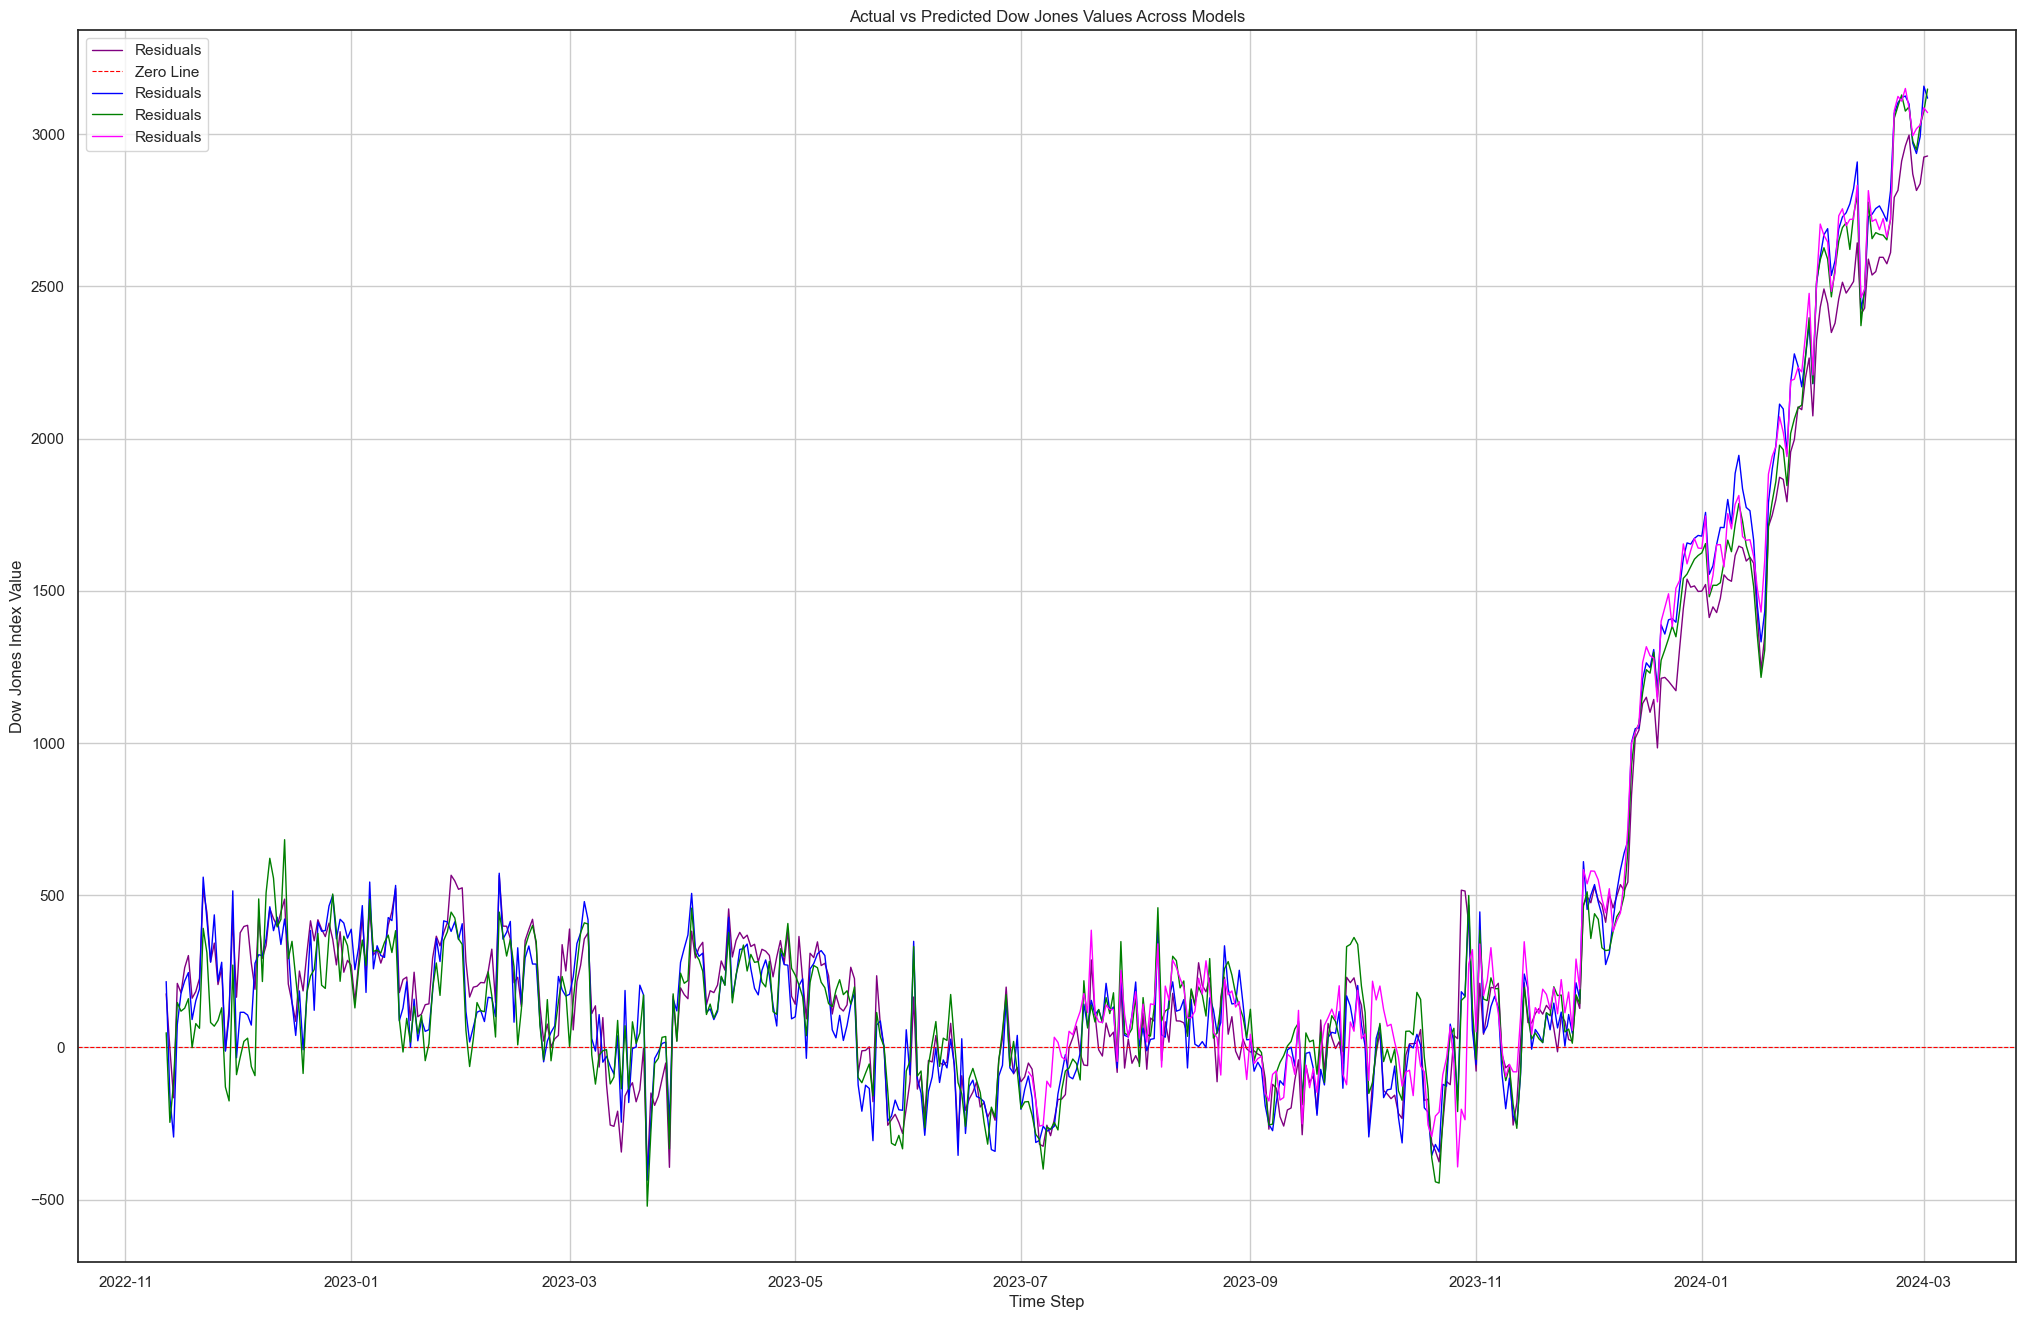

In [ ]:
sns.set(style="white")

plt.figure(figsize=(25, 16))

# Loop 1
plt.plot(y_test.index, residuals, label='Residuals', color='purple', linewidth=1)
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Zero Line')

# Loop 2
#plt.plot(y_test_l2.index, y_test_l2, label='Actual Dow Jones (Loop 2)', linestyle='-', color='cyan')
plt.plot(y_test_l2.index, residuals_l2, label='Residuals', color='blue', linewidth=1)

# Loop 3
#plt.plot(y_test_l3.index, y_test_l3, label='Actual Dow Jones (Loop 3)', linestyle='-', color='orange')
plt.plot(y_test_l3.index, residual_l3, label='Residuals', color='green', linewidth=1)

# Loop 4
#plt.plot(y_test_l4.index, y_test_l4, label='Actual Dow Jones (Loop 4)', linestyle='-', color='red')
plt.plot(y_test_l4.index, residuals_l4, label='Residuals', color='magenta', linewidth=1)


plt.xlabel("Time Step")
plt.ylabel("Dow Jones Index Value")
plt.title("Actual vs Predicted Dow Jones Values Across Models")
plt.legend()
plt.grid()
plt.savefig('XGBoost_Actual_vs_Predicted_AllLoops.pdf', format='pdf')
plt.show()


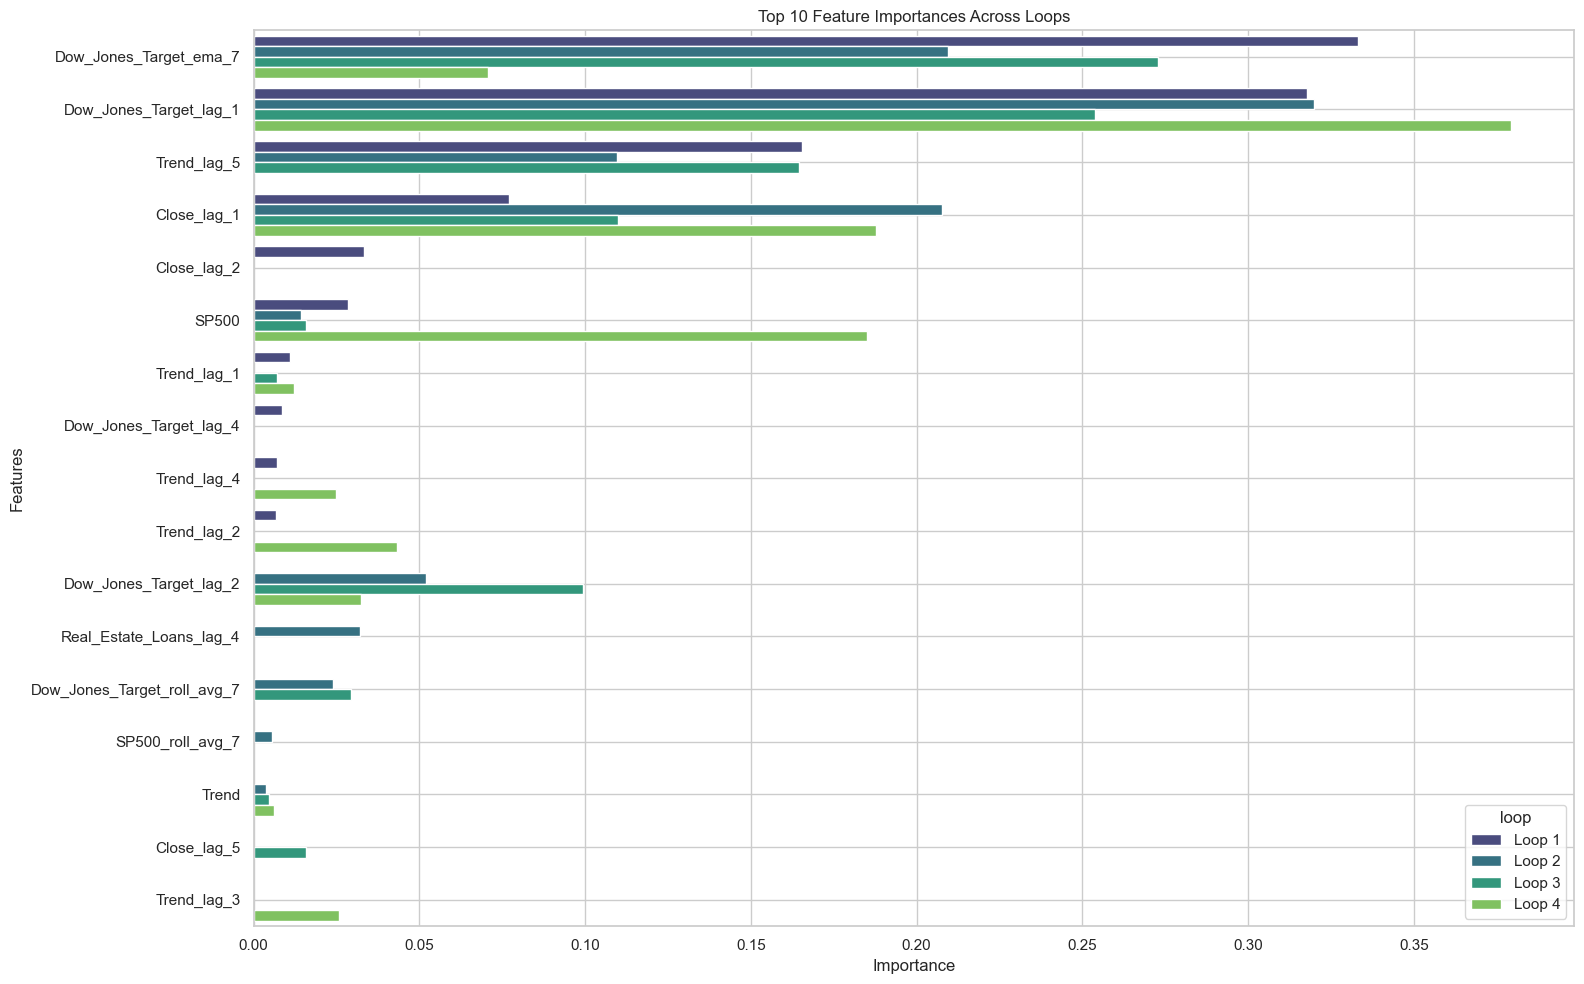

In [ ]:
# Example: Combine feature importances from all loops into one DataFrame
feature_importances = pd.DataFrame(data=xg_reg.feature_importances_,
                                      index=X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False).head(10)
feature_importances['loop'] = 'Loop 1'

feature_importances_l2 = pd.DataFrame(data=xg_reg_l2.feature_importances_,
                                      index=X_train_l2.columns,
                                      columns=['importance']).sort_values('importance', ascending=False).head(10)
feature_importances_l2['loop'] = 'Loop 2'

feature_importances_l3 = pd.DataFrame(data=xg_reg_l3.feature_importances_,
                                      index=X_train_l3.columns,
                                      columns=['importance']).sort_values('importance', ascending=False).head(10)
feature_importances_l3['loop'] = 'Loop 3'

feature_importances_l4 = pd.DataFrame(data=xg_reg_l4.feature_importances_,
                                      index=X_train_l4.columns,
                                      columns=['importance']).sort_values('importance', ascending=False).head(10)
feature_importances_l4['loop'] = 'Loop 4'


all_importances = pd.concat([feature_importances, feature_importances_l2, feature_importances_l3, feature_importances_l4])

all_importances = all_importances.reset_index().rename(columns={'index': 'feature'})

sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
sns.barplot(x='importance', y='feature', hue='loop', data=all_importances, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances Across Loops')
plt.grid(True)
plt.tight_layout()
plt.savefig('feature_importances_XGBoost_all_loops.pdf', format='pdf', bbox_inches='tight')
plt.show()
